---

## Credit Card Default Prediction

Nama  : Iznia Azyati


Program ini dibuat untuk melakukan Prediksi kemampuan bayar kostumer yang 
untuk mengavaluasi kinerja pembayaran pemilik credit card dengan machine 
learning. Machine Learning dibuat berdasarkan pembelajaran model data 
peminjaman yang sudah ada sebelumnya dengan mempertimbangkan beberapa aspek 
didalamnya. Hasil Prediksi yang muncul pada model machine learning dapat 
menjadi pertimbangan untuk keputusan berikutnya.

**Objective:**
Membuat model Classification untuk memprediksi `default_payment_next_month` 
menggunakan Logistic Regression, SVM, dan KNN.

----


## **2. Query SQL**

#### Original Dataset

<center>

|Column Name	| Type	        | Description                                                                                                   |
|---------------|---------------|---------------------------------------------------------------------------------------------------------------|
|limit_balance	|FLOAT	        |Amount of given credit in NT dollars (includes individual and family/supplementary credit||
|sex	|STRING	|Gender (1=male, 2=female)|
|education_level	|STRING	|Education Level (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)|
|marital_status	|STRING	|Marital status (1=married, 2=single, 3=others)|
|age	|FLOAT	|Age in years|
|pay_0	|FLOAT	|Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)|
|pay_2	|FLOAT	|Repayment status in August, 2005 (scale same as above)|
|pay_3	|FLOAT	|Repayment status in July, 2005 (scale same as above)|
|pay_4	|FLOAT	|Repayment status in June, 2005 (scale same as above)|
|pay_5	|STRING	|Repayment status in May, 2005 (scale same as above)|
|pay_6	|STRING	|Repayment status in April, 2005 (scale same as above)|
|bill_amt_1	|FLOAT	|Amount of bill statement in September, 2005 (NT dollar)|
|bill_amt_2	|FLOAT	|Amount of bill statement in August, 2005 (NT dollar)|
|bill_amt_3	|FLOAT	|Amount of bill statement in July, 2005 (NT dollar)|
|bill_amt_4	|FLOAT	|Amount of bill statement in June, 2005 (NT dollar)|
|bill_amt_5	|FLOAT	|Amount of bill statement in May, 2005 (NT dollar)|
|bill_amt_6	|FLOAT	|Amount of bill statement in April, 2005 (NT dollar)|
|pay_amt_1	|FLOAT	|Amount of previous payment in September, 2005 (NT dollar)|
|pay_amt_2	|FLOAT	|Amount of previous payment in August, 2005 (NT dollar)|
|pay_amt_3	|FLOAT	|Amount of previous payment in July, 2005 (NT dollar)|
|pay_amt_4	|FLOAT	|Amount of previous payment in June, 2005 (NT dollar)|
|pay_amt_5	|FLOAT	|Amount of previous payment in May, 2005 (NT dollar)|
|pay_amt_6	|FLOAT	|Amount of previous payment in April, 2005 (NT dollar)|
|default_payment_next_month	|STRING	|Default payment (1=yes, 0=no)|


In [1]:
# Query SQL

'''
SELECT 
    CAST(limit_balance AS INT64) AS limit_balance,
    CAST(sex AS INT64) AS sex,
    CAST(education_level AS INT64) AS education_level,
    CAST(marital_status AS INT64) AS marital_status,
    age,
    pay_0,
    pay_2,
    pay_3,
    pay_4,
    CAST(pay_5 AS FLOAT64) AS pay_5,
    CAST(pay_6 AS FLOAT64) AS pay_6,
    bill_amt_1,
    bill_amt_2,
    bill_amt_3,
    bill_amt_4,
    bill_amt_5,
    bill_amt_6,
    pay_amt_1,
    pay_amt_2,
    pay_amt_3,
    pay_amt_4,
    pay_amt_5,
    pay_amt_6,
    CAST(default_payment_next_month AS INT64) AS default_payment_next_month
FROM 
    `bigquery-public-data.ml_datasets.credit_card_default`
LIMIT 64000
'''

'\nSELECT \n    CAST(limit_balance AS INT64) AS limit_balance,\n    CAST(sex AS INT64) AS sex,\n    CAST(education_level AS INT64) AS education_level,\n    CAST(marital_status AS INT64) AS marital_status,\n    age,\n    pay_0,\n    pay_2,\n    pay_3,\n    pay_4,\n    CAST(pay_5 AS FLOAT64) AS pay_5,\n    CAST(pay_6 AS FLOAT64) AS pay_6,\n    bill_amt_1,\n    bill_amt_2,\n    bill_amt_3,\n    bill_amt_4,\n    bill_amt_5,\n    bill_amt_6,\n    pay_amt_1,\n    pay_amt_2,\n    pay_amt_3,\n    pay_amt_4,\n    pay_amt_5,\n    pay_amt_6,\n    CAST(default_payment_next_month AS INT64) AS default_payment_next_month\nFROM \n    `bigquery-public-data.ml_datasets.credit_card_default`\nLIMIT 64000\n'

Query ini bertujuan untuk mengambil 64.000 baris data dari tabel `credit_card_default` dengan kolom-kolom yang relevan untuk analisis. Kolom-kolom yang diambil diubah tipe datanya sesuai kebutuhan dan kemudian disimpan dalam format CSV untuk analisis lebih lanjut.

(dataset asli hanya sebanyak 2.965)

## **3. Import Libraries**

In [2]:
# import libraries yang dibutuhkan

## data manipulation
import pandas as pd
import numpy as np

## plotting
import seaborn as sns
import matplotlib.pyplot as plt

import phik
from phik import resources
from phik.report import plot_correlation_matrix
from feature_engine.outliers import Winsorizer

## modelling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, cross_val_score, cross_validate
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, ConfusionMatrixDisplay,  accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# saving models
import pickle
import json



## **4. Data Loading**

In [3]:
# Load the dataset
data = pd.read_csv('P1G5_Set_1_Iznia_Azyati.csv')

# Duplicate Dataset
data_duplicate = data.copy()

In [4]:
# Display the first 10 rows
print("First 10 rows of the dataset:")
data.head(10)

First 10 rows of the dataset:


,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,80000.0,1,6,1,54.0,0.0,0.0,0.0,0.0,0,...,29296.0,26210.0,17643.0,2545.0,2208.0,1336.0,2232.0,542.0,348.0,1
1,200000.0,1,4,1,49.0,0.0,0.0,0.0,0.0,0,...,50146.0,50235.0,48984.0,1689.0,2164.0,2500.0,3480.0,2500.0,3000.0,0
2,20000.0,2,6,2,22.0,0.0,0.0,0.0,0.0,0,...,1434.0,500.0,0.0,4641.0,1019.0,900.0,0.0,1500.0,0.0,1
3,260000.0,2,4,2,33.0,0.0,0.0,0.0,0.0,0,...,27821.0,30767.0,29890.0,5000.0,5000.0,1137.0,5000.0,1085.0,5000.0,0
4,150000.0,1,4,2,32.0,0.0,0.0,0.0,-1.0,0,...,150464.0,143375.0,146411.0,4019.0,146896.0,157436.0,4600.0,4709.0,5600.0,0
5,300000.0,2,4,2,32.0,0.0,0.0,0.0,0.0,0,...,65150.0,-450.0,700.0,15235.0,1491.0,1303.0,0.0,2000.0,1400.0,0
6,130000.0,1,1,1,45.0,0.0,0.0,0.0,0.0,0,...,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0,0
7,200000.0,1,1,1,58.0,0.0,0.0,0.0,0.0,0,...,124647.0,126921.0,129167.0,7822.0,4417.0,4446.0,4597.0,4677.0,4698.0,0
8,500000.0,1,1,1,39.0,0.0,0.0,0.0,0.0,0,...,174500.0,137406.0,204975.0,54209.0,4607.0,4603.0,5224.0,207440.0,7509.0,0
9,230000.0,1,1,1,48.0,0.0,0.0,0.0,0.0,0,...,105508.0,108101.0,110094.0,7000.0,6607.0,3773.0,4290.0,4164.0,2000.0,0


Hasilnya menampilkan 10 data awal dari dataset, yang mencakup rincian tentang setiap klien seperti usia, jenis kelamin, tingkat pendidikan, serta informasi mengenai pembayaran, tagihan, dan apakah mereka gagal membayar pada bulan berikutnya. 

Langkah selanjutnya adalah menampilkan 10 entri terakhir dari dataset.

In [5]:
# Display the last 10 rows
print("Last 10 rows of the dataset:")
data.tail(10)


Last 10 rows of the dataset:


,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
2955,360000.0,2,2,2,26.0,-1.0,-1.0,-1.0,-1.0,-2,...,0.0,0.0,0.0,463.0,2500.0,0.0,0.0,0.0,0.0,0
2956,100000.0,1,3,1,40.0,0.0,0.0,-1.0,-1.0,-2,...,0.0,0.0,0.0,2000.0,2377.0,40000.0,0.0,0.0,0.0,0
2957,30000.0,2,3,1,48.0,1.0,-1.0,-1.0,-2.0,-2,...,0.0,0.0,0.0,200.0,0.0,0.0,0.0,0.0,0.0,0
2958,80000.0,2,3,1,39.0,-1.0,-1.0,-1.0,-1.0,-2,...,0.0,0.0,5000.0,5000.0,5000.0,0.0,5000.0,5000.0,470.0,0
2959,20000.0,1,3,2,26.0,-1.0,-1.0,-1.0,-2.0,-2,...,0.0,0.0,0.0,1560.0,0.0,0.0,0.0,0.0,0.0,0
2960,80000.0,2,3,2,28.0,-1.0,-1.0,-1.0,-2.0,-2,...,0.0,0.0,0.0,2800.0,0.0,0.0,0.0,0.0,0.0,0
2961,50000.0,2,3,1,51.0,-1.0,-1.0,-1.0,-1.0,-2,...,0.0,0.0,0.0,300.0,5880.0,0.0,0.0,0.0,0.0,1
2962,450000.0,2,2,1,38.0,-2.0,-2.0,-2.0,-2.0,-2,...,390.0,390.0,390.0,390.0,780.0,390.0,390.0,390.0,390.0,1
2963,50000.0,2,2,1,44.0,-2.0,-2.0,-2.0,-2.0,-2,...,390.0,390.0,0.0,390.0,390.0,390.0,390.0,0.0,780.0,0
2964,290000.0,2,2,1,39.0,1.0,-2.0,-2.0,-2.0,-2,...,3184.0,390.0,390.0,10000.0,800.0,3184.0,390.0,390.0,6617.0,0


Outputnya menampilkan 10 data terakhir dataset. Mengamati awal dan akhir dari dataset menunjukkan bahwa kolom kategori tertentu sudah dikodekan secara numerik.

In [6]:
# Check shape of the dataset
print("Shape of the dataset:", data.shape)


Shape of the dataset: (2965, 24)


Pada dataset ini terdapat 2.965 baris dengan 24 kolom

Untuk insight data yang lebih mendalam, method `info` digunakan untuk memeriksa informasi ringkasan kumpulan data.

In [7]:
# Display informasi data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   limit_balance               2965 non-null   float64
 1   sex                         2965 non-null   int64  
 2   education_level             2965 non-null   int64  
 3   marital_status              2965 non-null   int64  
 4   age                         2965 non-null   float64
 5   pay_0                       2965 non-null   float64
 6   pay_2                       2965 non-null   float64
 7   pay_3                       2965 non-null   float64
 8   pay_4                       2965 non-null   float64
 9   pay_5                       2965 non-null   int64  
 10  pay_6                       2965 non-null   int64  
 11  bill_amt_1                  2965 non-null   float64
 12  bill_amt_2                  2965 non-null   float64
 13  bill_amt_3                  2965 

In [8]:
# Check missing values
print("Missing values in each column:")
data.isnull().sum()

Missing values in each column:


limit_balance                 0
sex                           0
education_level               0
marital_status                0
age                           0
pay_0                         0
pay_2                         0
pay_3                         0
pay_4                         0
pay_5                         0
pay_6                         0
bill_amt_1                    0
bill_amt_2                    0
bill_amt_3                    0
bill_amt_4                    0
bill_amt_5                    0
bill_amt_6                    0
pay_amt_1                     0
pay_amt_2                     0
pay_amt_3                     0
pay_amt_4                     0
pay_amt_5                     0
pay_amt_6                     0
default_payment_next_month    0
dtype: int64

Pada dataset ini ada **24 kolom** dengan total **2.965 baris** dan masing-masing data terdiri dari 18 kolom bertipe float, dan 6 kolom bertipe integer. Hasilnya menunjukkan bahwa tidak ada missing values di kolom manapun dan datanya telah di convert juga ke format numerik.

Tapi, kolom-kolom ini akan dikategorikan berdasarkan tipenya untuk memudahkan handling pada proses selanjutnya.

Tidak ada missing value pada dataset ini

| **Category**  | **Type**     | **Column Names**                                           |
|---------------|--------------|------------------------------------------------------------|
| **Categorical** | **Ordinal Encoded**   | `educational_level`, `pay_0`, `pay_2`, `pay_3`,|               
|                 |                        | `pay_4`, `pay_5`, `pay_6`   |
|                 | **Nominal Encoded**  | `sex`, `marital_status`         |
| **Numerical**   |  | `limit_balance`, `age`            |
|               | | `bill_amt_1`, `bill_amt_2`, `bill_amt_3`, `bill_amt_4`,       |
|               |              | `bill_amt_5`, `bill_amt_6`, `pay_amt_1`, `pay_amt_2`,        |
|               |              | `pay_amt_3`, `pay_amt_4`, `pay_amt_5`, `pay_amt_6`  |

In [9]:
#check total unique values
data.nunique()

limit_balance                   59
sex                              2
education_level                  7
marital_status                   4
age                             49
pay_0                           11
pay_2                           10
pay_3                            9
pay_4                           10
pay_5                            9
pay_6                            8
bill_amt_1                    2643
bill_amt_2                    2592
bill_amt_3                    2549
bill_amt_4                    2504
bill_amt_5                    2482
bill_amt_6                    2461
pay_amt_1                     1415
pay_amt_2                     1372
pay_amt_3                     1302
pay_amt_4                     1214
pay_amt_5                     1194
pay_amt_6                     1189
default_payment_next_month       2
dtype: int64

Ada beberapa kolom seperti `sex`, `educational_level`, `marital_status`, dll. yang memiliki nilai unik value yang kecil. 

In [10]:
# Check column to list  
data.columns.tolist()

['limit_balance',
 'sex',
 'education_level',
 'marital_status',
 'age',
 'pay_0',
 'pay_2',
 'pay_3',
 'pay_4',
 'pay_5',
 'pay_6',
 'bill_amt_1',
 'bill_amt_2',
 'bill_amt_3',
 'bill_amt_4',
 'bill_amt_5',
 'bill_amt_6',
 'pay_amt_1',
 'pay_amt_2',
 'pay_amt_3',
 'pay_amt_4',
 'pay_amt_5',
 'pay_amt_6',
 'default_payment_next_month']

In [11]:
# Check descriptive statistics
print("Descriptive statistics of the dataset:")
data.describe().T

Descriptive statistics of the dataset:


,count,mean,std,min,25%,50%,75%,max
limit_balance,2965.0,163369.308600,125030.415472,10000.0,50000.0,140000.0,230000.0,800000.0
sex,2965.0,1.607757,0.488333,1.0,1.0,2.0,2.0,2.0
education_level,2965.0,1.849578,0.778184,0.0,1.0,2.0,2.0,6.0
marital_status,2965.0,1.559865,0.522317,0.0,1.0,2.0,2.0,3.0
age,2965.0,35.193255,9.109439,21.0,28.0,34.0,41.0,69.0
pay_0,2965.0,0.005059,1.114395,-2.0,-1.0,0.0,0.0,8.0
pay_2,2965.0,-0.122428,1.180784,-2.0,-1.0,0.0,0.0,7.0
pay_3,2965.0,-0.141653,1.183630,-2.0,-1.0,0.0,0.0,7.0
pay_4,2965.0,-0.185160,1.178322,-2.0,-1.0,0.0,0.0,8.0
pay_5,2965.0,-0.225295,1.159003,-2.0,-1.0,0.0,0.0,7.0


- Pada kolom `limit_balance` ada 2965 data yang tersedia untuk kolom ini. Rata-rata limit balance adalah 163369.31 dengan penyimpangan standar sebesar 125030.42 serta nilai maksimum limit balance adalah 800000.0.
- Pada kolom `education_level` rata-rata education_level adalah 1.85 dengan penyimpangan standar sebesar 0.78 serta nilai maksimum education_level adalah 6.
- Pada kolom `age` memiliki rata-rata age adalah 35.19 tahun dengan standar deviasi sebesar 9.11 tahun. Usia minimum adalah 21 tahun dan usia maksimum adalah 69 tahun.
- Pada kolom `default_payment_next_month` menunjukkan rata-rata rata-rata nilai adalah 0.21, yang mengindikasikan bahwa sekitar 21% dari data default pada pembayaran bulan berikutnya, dengan  standar deviasi sebesar 0.41 serta nilai maksimum default_payment_next_month adalah 1 (default).

## **5. Exploratory Data Analysis (EDA)**

Melakukan eksplorasi data dan visaulisasi data untuk memahami struktur dan karakteristik dataset.

##### **i. Distribusi Limit Balance**

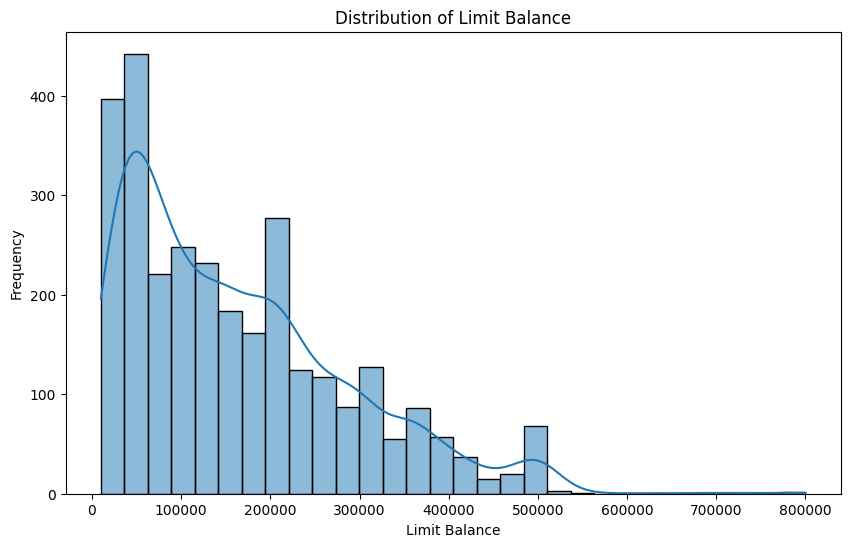

In [12]:
# Distribusi Limit Balance

plt.figure(figsize=(10, 6))
sns.histplot(data['limit_balance'], bins=30, kde=True)
plt.title('Distribution of Limit Balance')
plt.xlabel('Limit Balance')
plt.ylabel('Frequency')
plt.show()

Insight:
- Distribusi `limit_balance` tampaknya miring ke kanan (right-skewed), yang berarti ada lebih banyak pelanggan dengan limit balance yang lebih rendah dibandingkan yang lebih tinggi.
- Mayoritas pelanggan memiliki limit balance yang rendah, dengan nilai yang sering muncul berada di kisaran antara 50.000 hingga 100.000.
- Ada beberapa pelanggan dengan limit balance yang sangat tinggi, tetapi mereka jumlahnya sedikit.
- Distribusi limit balance tidak normal, dan lebih banyak nilai yang terkumpul di sisi kiri histogram.
- Mengingat skala besar dari Limit Balance, sangat penting untuk melakukan normalisasi atau standardisasi fitur ini sebelum melatih model. Ini akan memastikan bahwa fitur Limit Balance memiliki pengaruh yang seimbang dengan fitur lainnya.

##### **ii. Distribusi of Age**

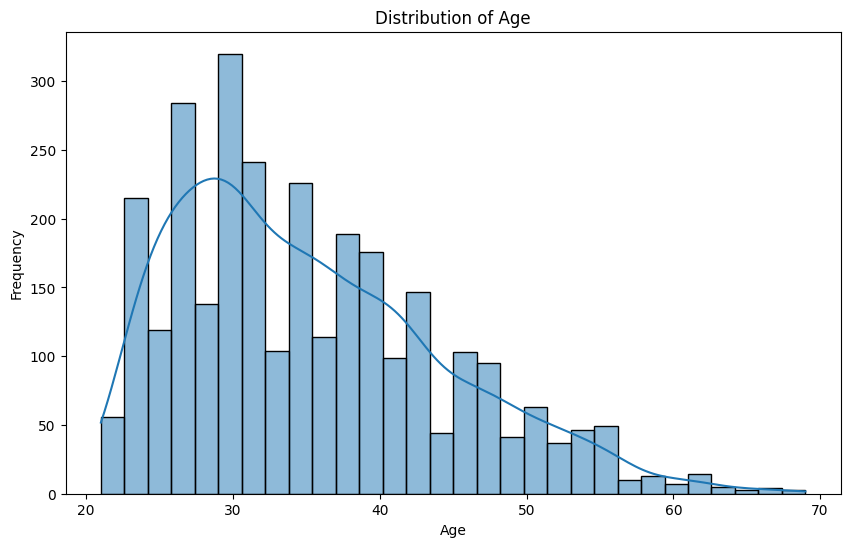

In [13]:
# Distribusi Usia

plt.figure(figsize=(10, 6))
sns.histplot(data['age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Insight:
- Mayoritas pelanggan berada di usia muda hingga pertengahan (sekitar 20 hingga 40 tahun).
- Ada penurunan jumlah pelanggan yang signifikan seiring dengan bertambahnya usia.
- Distribusi umur tidak normal, dengan lebih banyak nilai yang terkumpul di sisi kiri histogram.

Usia bisa menjadi fitur penting dalam model karena dapat mempengaruhi perilaku pelanggan, seperti kemampuan mereka untuk membayar kembali kredit. Oleh karena itu, penting untuk memastikan bahwa fitur ini diperlakukan dengan benar dalam proses modeling.

##### **iii. Default Payment Next Month Percentages**

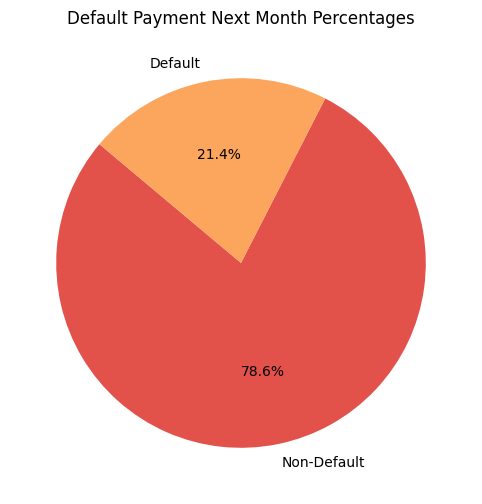

In [14]:
# Replace numerical labels with its name
default_status = data['default_payment_next_month'].replace({1: 'Default',
                                                           0: 'Non-Default'})

# Count the occurrences of default categories
default_counts = default_status.value_counts()

# Calculate the percentage for each default category
default_percentages = (default_counts / default_counts.sum()) * 100

# Plotting the pie chart
plt.figure(figsize=(10, 6))
plt.pie(default_percentages, labels=default_percentages.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Spectral'))
plt.title('Default Payment Next Month Percentages')

plt.show()

Pie chart ini menunjukkan seberapa banyak klien yang melakukan pembayaran tepat waktu dan yang tidak tepat waktu. Mostly, sebesar 78.6% membayar tepat waktu (non-default). Namun sekitar 21,4% tidak membayar tepat waktu (default). Kelompok yang lebih kecil (default) ini perlu perhatian lebih dari lembaga kredit untuk mencari tahu mengapa mereka kesulitan dalam pembayaran. 

Mempelajari lebih lanjut tentang klien-klien ini dapat membantu meningkatkan penilaian risiko dan metode penilaian kredit.

Insight:
- Data sangat tidak seimbang (imbalanced). Jumlah pelanggan yang tidak default jauh lebih banyak dibandingkan dengan jumlah pelanggan yang default.
- Mayoritas Pelanggan Tidak Default: Sebagian besar pelanggan tidak mengalami default pada pembayaran bulan depan.
- Minoritas Pelanggan Default: Sebagian kecil pelanggan mengalami default pada pembayaran bulan depan.

##### **iv. Sex Percentages**

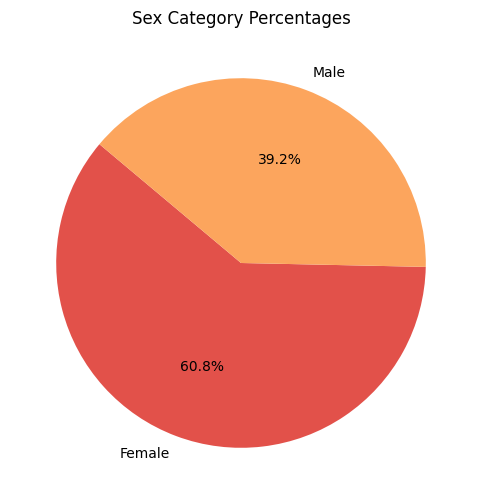

In [15]:
# Replace numerical labels with its name
sex_category = data['sex'].replace({1: 'Male',
                                    2: 'Female'})

# Count the occurrences of sex categories
sex_counts = sex_category.value_counts()

# Calculate the percentage for each sex category
sex_percentages = (sex_counts / sex_counts.sum()) * 100

# Plotting the pie chart
plt.figure(figsize=(10, 6))
plt.pie(sex_percentages, labels=sex_percentages.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Spectral'))
plt.title('Sex Category Percentages')
plt.show()

Pada dataset ini didominasi oleh perempuan dengan persentase 60.8% client, dan laki-laki sebanyak 39.2%

##### **v. Education Level**

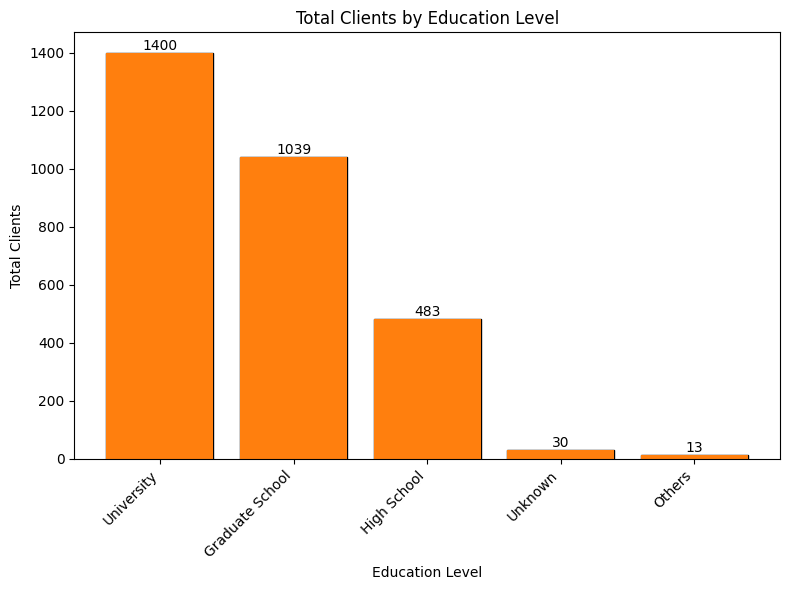

In [16]:
# Replace numerical labels with its name
edu_category = data['education_level'].replace({0: 'Unknown',
                                              1: 'Graduate School',
                                              2: 'University',
                                              3: 'High School',
                                              4: 'Others',
                                              5: 'Unknown',
                                              6: 'Unknown'})

# Count the occurrences of each education category
edu_level_counts = edu_category.value_counts().sort_values(ascending=False)

# Convert index labels to strings for plotting
x_labels = edu_level_counts.index.astype(str)
y_values = edu_level_counts.values

# Plotting the bar graph
plt.figure(figsize=(8, 6))
bars = plt.bar(x_labels, y_values, edgecolor='black')
plt.bar(x_labels, y_values)
plt.xlabel('Education Level')
plt.ylabel('Total Clients')
plt.title('Total Clients by Education Level')
plt.xticks(rotation=45, ha='right')

# Adding the text labels above the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 1), ha='center', va='bottom')

plt.tight_layout()
plt.show()


Insight:
- Dominasi Level Pendidikan: Sebagian besar pemilik kartu kredit berada pada level pendidikan University, Graduate School, dan High School. 
- Keberadaan Nilai Tidak Valid: Ada beberapa nilai 0 yang mungkin merepresentasikan data yang tidak valid atau tidak diketahui.
- Kategori yang Jarang: Nilai 4, 5 dan 6 jarang muncul, yang bisa berarti kategori ini kurang umum di antara pemilik kartu kredit.
- Akan dilakukan handling pada data yang tidak valid pada saat feature engineering. 

##### **vi. Marital Status**

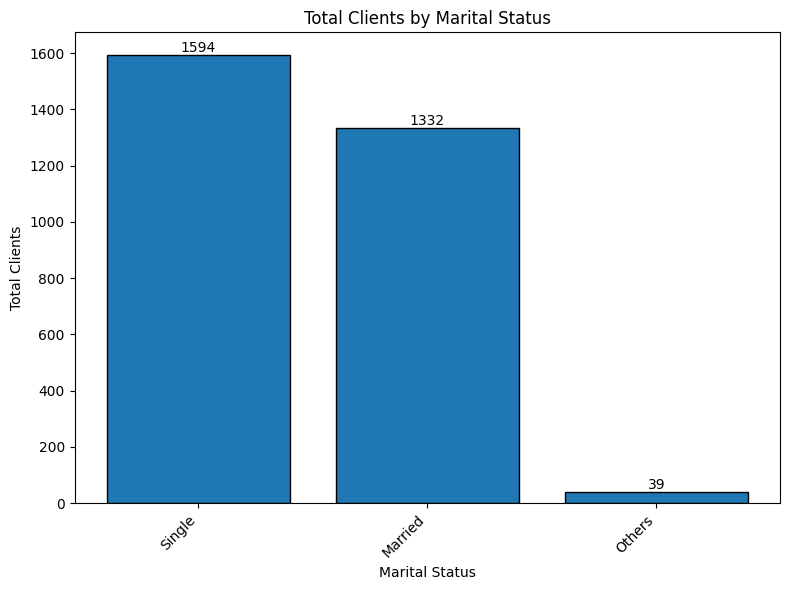

In [17]:
# Replace numerical labels with its name
marital_category = data['marital_status'].replace({
    0: 'Others',
    1: 'Married',
    2: 'Single',
    3: 'Others'
})

# Count the occurrences of each marital category
marital_counts = marital_category.value_counts().sort_values(ascending=False)

# Convert index labels to strings for plotting
x_labels = marital_counts.index.astype(str)
y_values = marital_counts.values

# Plotting the bar graph
plt.figure(figsize=(8, 6))
bars = plt.bar(x_labels, y_values, edgecolor='black')
plt.xlabel('Marital Status')
plt.ylabel('Total Clients')
plt.title('Total Clients by Marital Status')
plt.xticks(rotation=45, ha='right')

# Adding the text labels above the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 1), ha='center', va='bottom')

plt.tight_layout()
plt.show()


Bar Chart diatas menunjukkan jumlah total klien menurut status perkawinannya, dengan X mewakili status perkawinan dan Y mewakili jumlah total klien. Jumlah klien terbanyak adalah yang masih single (1594 orang), disusul sudah Married (1332) dan lain-lain (39).

Dari analisis ini, terlihat jelas bahwa sebagian besar kliennya belum menikah, dan sebagian besar klien perusahaan ini adalah para single.

##### **vii. Limit Balance by Sex**

Mean Limit Balance by Sex:
   sex  limit_balance
0    1  158925.193465
1    2  166237.513873


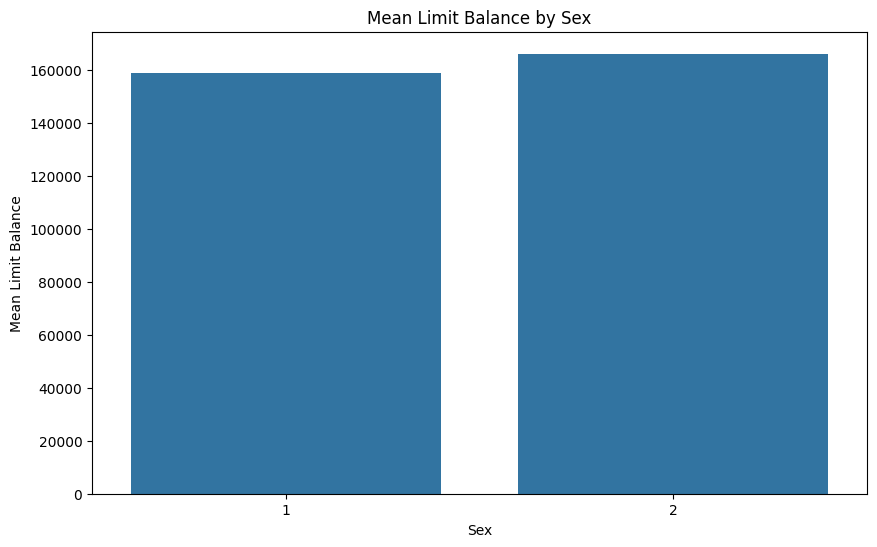

In [18]:
# Limit Balance berdasarkan Jenis Kelamin

# Group by sex and calculate the mean limit_balance
grouped_sex = data.groupby('sex')['limit_balance'].mean().reset_index()
print("Mean Limit Balance by Sex:")
print(grouped_sex)

# Visualize
plt.figure(figsize=(10, 6))
sns.barplot(x='sex', y='limit_balance', data=grouped_sex)
plt.title('Mean Limit Balance by Sex')
plt.xlabel('Sex')
plt.ylabel('Mean Limit Balance')
plt.show()


Insight:
- Perbedaan Rata-Rata Limit Balance: Ada perbedaan yang terlihat antara rata-rata limit balance untuk kedua kelompok jenis kelamin.
- Analisis Lanjutan: Perbedaan ini mungkin perlu dianalisis lebih lanjut untuk memahami faktor-faktor yang mempengaruhinya, seperti pendapatan, pekerjaan, atau kebijakan kredit dari lembaga keuangan.

##### **viii. Default Payment by Education Level**

Proportion of Default Payment by Education Level:
default_payment_next_month         0         1
education_level                               
0                           1.000000       NaN
1                           0.829644  0.170356
2                           0.755714  0.244286
3                           0.766046  0.233954
4                           1.000000       NaN
5                           0.958333  0.041667
6                           0.500000  0.500000


<Figure size 1000x600 with 0 Axes>

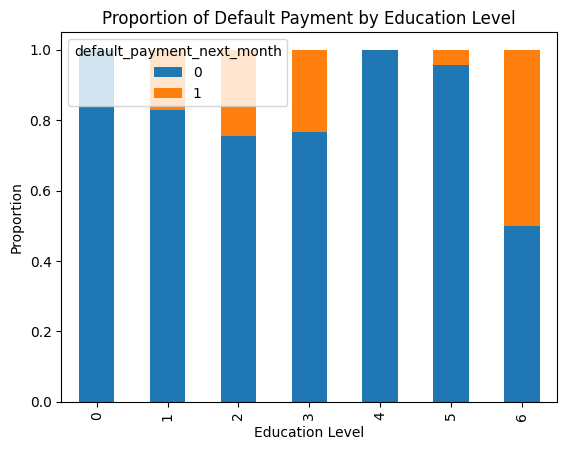

In [19]:
# Default Payment berdasarkan Tingkat Pendidikan

# Group by education_level and calculate the count of default payment
grouped_education = data.groupby('education_level')['default_payment_next_month'].value_counts(normalize=True).unstack()
print("Proportion of Default Payment by Education Level:")
print(grouped_education)

# Visualize
plt.figure(figsize=(10, 6))
grouped_education.plot(kind='bar', stacked=True)
plt.title('Proportion of Default Payment by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Proportion')
plt.show()


Insight:
- Tingkat pendidikan lainnya menunjukkan variasi dalam proporsi default payment, dengan Level 6 memiliki proporsi yang sama untuk default dan tidak default.
- Kategori dengan nilai 0, 5, dan 6 menunjukkan adanya data yang tidak sesuai atau kategori tidak valid. Ini memerlukan perhatian khusus dalam proses pembersihan data untuk memastikan bahwa semua nilai berada dalam kategori yang valid.
-  Ada variasi dalam proporsi default payment berdasarkan tingkat pendidikan, dengan beberapa tingkat pendidikan menunjukkan risiko default yang lebih tinggi atau lebih rendah.
- Perlu mempertimbangkan untuk mengganti nilai ini atau mengelompokkannya ke dalam kategori lain yang relevan.


##### **ix. Bill Amounts over 6 Months**

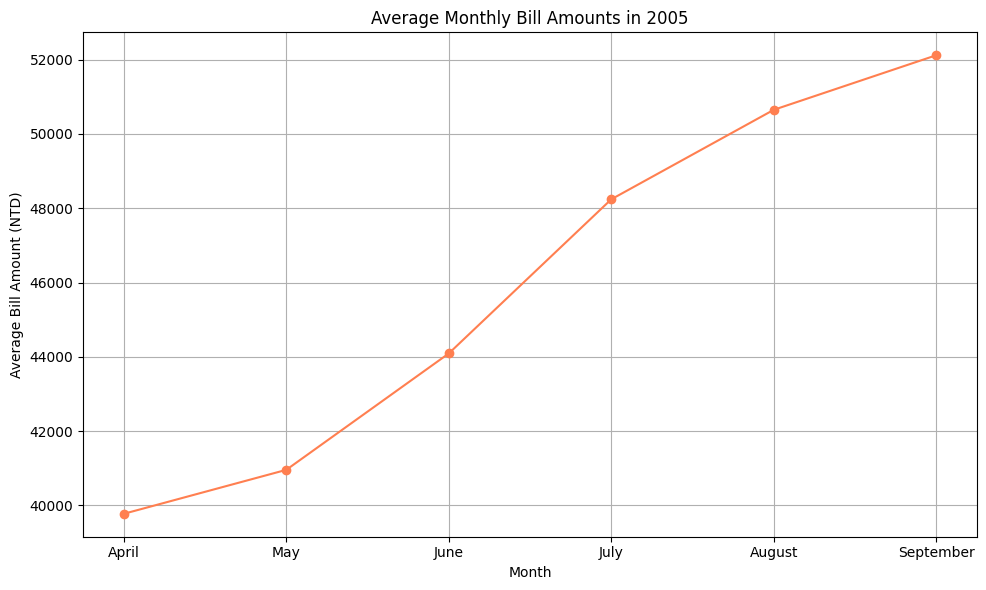

In [20]:
# Rename columns
bill_amount = data.rename(columns={'bill_amt_1': 'September',
                                 'bill_amt_2': 'August',
                                 'bill_amt_3': 'July',
                                 'bill_amt_4': 'June',
                                 'bill_amt_5': 'May',
                                 'bill_amt_6': 'April'})

# Calculate the average of payment status for each month
bill_amounts_avg = bill_amount[['September', 'August', 'July', 'June', 'May', 'April']].mean()

month_label = ['April', 'May', 'June','July', 'August', 'September']
bill_amounts_avg = bill_amounts_avg.reindex(month_label)

# Plotting the line graph
plt.figure(figsize=(10, 6))
plt.plot(bill_amounts_avg.index, bill_amounts_avg.values, marker='o', linestyle='-', color='coral')
plt.title('Average Monthly Bill Amounts in 2005')
plt.xlabel('Month')
plt.ylabel('Average Bill Amount (NTD)')
plt.xticks(ticks=range(len(bill_amounts_avg.index)), labels=bill_amounts_avg.index)
plt.grid(True)
plt.tight_layout()
plt.show()

Dari line graph ini menunjukkan peningkatan dalam rata-rata monthly bill amounts in New Taiwan Dollars (NTD) dari bulan April sampai September 2005. Mulai dari titik terendah pada bulan april, kemudian ada peningkatan yang konsisten di setiap bulannya. Hal ini menunjukkan adanya seasonal pattern dalam pembelanjan atau bill accumulation. Dima orang-orang memiliki pengeluaruan yang lebih tinggi menjelang akhir tahun.

## **6. Feature Engineering**

##### **a. Handling Invalid Categories**

Mengatasi kategori tidak valid dalam data.

In [21]:
# Replace unknown values in the education_level column to others (4)
data['education_level'].replace(to_replace=[0, 5, 6], value=4, inplace=True)

# Replace unknown values in the marital_status column
data['marital_status'].replace(to_replace=0, value=3, inplace=True)


print("Value counts for 'education_level' and 'marital_status' column after replacement:")
print(data['education_level'].value_counts())
print(data['marital_status'].value_counts())

Value counts for 'education_level' and 'marital_status' column after replacement:
education_level
2    1400
1    1039
3     483
4      43
Name: count, dtype: int64
marital_status
2    1594
1    1332
3      39
Name: count, dtype: int64


C:\Users\hp\AppData\Local\Temp\ipykernel_149304\1685917383.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['education_level'].replace(to_replace=[0, 5, 6], value=4, inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_149304\1685917383.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

##### **b. Split between X (Features) and y (target)**

In [22]:
# Define the target variable and features
X = data.drop(['default_payment_next_month'], axis=1)
y = data['default_payment_next_month']

# Display X
X

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
0,80000.0,1,4,1,54.0,0.0,0.0,0.0,0.0,0,...,62290.0,29296.0,26210.0,17643.0,2545.0,2208.0,1336.0,2232.0,542.0,348.0
1,200000.0,1,4,1,49.0,0.0,0.0,0.0,0.0,0,...,50942.0,50146.0,50235.0,48984.0,1689.0,2164.0,2500.0,3480.0,2500.0,3000.0
2,20000.0,2,4,2,22.0,0.0,0.0,0.0,0.0,0,...,15535.0,1434.0,500.0,0.0,4641.0,1019.0,900.0,0.0,1500.0,0.0
3,260000.0,2,4,2,33.0,0.0,0.0,0.0,0.0,0,...,27086.0,27821.0,30767.0,29890.0,5000.0,5000.0,1137.0,5000.0,1085.0,5000.0
4,150000.0,1,4,2,32.0,0.0,0.0,0.0,-1.0,0,...,161192.0,150464.0,143375.0,146411.0,4019.0,146896.0,157436.0,4600.0,4709.0,5600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,80000.0,2,3,2,28.0,-1.0,-1.0,-1.0,-2.0,-2,...,0.0,0.0,0.0,0.0,2800.0,0.0,0.0,0.0,0.0,0.0
2961,50000.0,2,3,1,51.0,-1.0,-1.0,-1.0,-1.0,-2,...,5880.0,0.0,0.0,0.0,300.0,5880.0,0.0,0.0,0.0,0.0
2962,450000.0,2,2,1,38.0,-2.0,-2.0,-2.0,-2.0,-2,...,390.0,390.0,390.0,390.0,390.0,780.0,390.0,390.0,390.0,390.0
2963,50000.0,2,2,1,44.0,-2.0,-2.0,-2.0,-2.0,-2,...,390.0,390.0,390.0,0.0,390.0,390.0,390.0,390.0,0.0,780.0


In [23]:
# Print shapes untuk verifikasi
print(X.shape, y.shape)

(2965, 23) (2965,)


##### **c. Splitting between Train-Set and Test-set**

In [24]:
# Membagi data menjadi train-test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Display the shapes of the train and test sets
print('Train Size: ', X_train.shape)
print('Test Size: ', X_test.shape)

# Show one of the variable 
X_train.head()

Train Size:  (2075, 23)
Test Size:  (890, 23)


,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
2546,450000.0,1,1,1,44.0,-2.0,-2.0,-2.0,-2.0,-2,...,4700.0,20916.0,9695.0,6361.0,3423.0,4700.0,20916.0,9695.0,6361.0,6447.0
1954,30000.0,2,2,1,40.0,2.0,2.0,3.0,3.0,2,...,30604.0,29834.0,29936.0,29862.0,2700.0,1500.0,0.0,1100.0,1000.0,0.0
1196,130000.0,2,3,2,27.0,0.0,0.0,0.0,0.0,0,...,119008.0,46659.0,47588.0,47698.0,5400.0,3941.0,1742.0,1671.0,1712.0,1730.0
2917,100000.0,2,1,2,36.0,1.0,-1.0,-1.0,-2.0,-2,...,0.0,0.0,0.0,0.0,780.0,0.0,0.0,7600.0,0.0,0.0
647,30000.0,2,2,1,27.0,0.0,0.0,0.0,0.0,0,...,22844.0,22101.0,19535.0,19580.0,1712.0,1400.0,442.0,391.0,500.0,0.0


Dalam Train-Set terdapat **2075** baris sementara pada Test-Set terdapat **890** baris. 

##### **d. Missing Value Handling**

Pada eksplorasi sebelumnya sudah dicek dan disimpulkan bahwa tidak ada missing values pada dataset. Oleh karena itu, pada bagian ini hanya akan mengecek ulang dari 4 variabel yang dipisahkan sebelumnya, dan memang memang tidak terdapat missing values.

In [25]:
# Check missing value in X_train
X_train.isnull().sum()

limit_balance      0
sex                0
education_level    0
marital_status     0
age                0
pay_0              0
pay_2              0
pay_3              0
pay_4              0
pay_5              0
pay_6              0
bill_amt_1         0
bill_amt_2         0
bill_amt_3         0
bill_amt_4         0
bill_amt_5         0
bill_amt_6         0
pay_amt_1          0
pay_amt_2          0
pay_amt_3          0
pay_amt_4          0
pay_amt_5          0
pay_amt_6          0
dtype: int64

In [26]:
# Check missing value in X_test
X_test.isnull().sum()

limit_balance      0
sex                0
education_level    0
marital_status     0
age                0
pay_0              0
pay_2              0
pay_3              0
pay_4              0
pay_5              0
pay_6              0
bill_amt_1         0
bill_amt_2         0
bill_amt_3         0
bill_amt_4         0
bill_amt_5         0
bill_amt_6         0
pay_amt_1          0
pay_amt_2          0
pay_amt_3          0
pay_amt_4          0
pay_amt_5          0
pay_amt_6          0
dtype: int64

In [27]:
# Check missing value in y_train
y_train.isnull().sum()

0

In [28]:
# Check missing value in y_test
y_test.isnull().sum()

0

Dapat dilihat dari 4 variabel itu (**X_train, y_train, X_test, and y_test**) bahwa tidak terdapat missing values. Jadi kita bisa langsung ke next step tanpa khawatir ada yang hilang/missing data.

##### **e. Outlier Handling**

Handling outlier biasanya dilakukan pada data numerikal. jadi kolom-kolom kategorikal seperti `sex, education_level, marital_status, pay_0, pay_2, pay_3, pay_4, pay_5, pay_6`, akan dikecualikan pada handling outlier ini. 

Untuk cek outliernya, bisa dengan Skewness sebagai indikator awal potensi outlier. Maka perlu dilakukan perhitungan Skewness untuk tiap kolon numerik. 

In [29]:
# Daftar kolom numerikal
numerical_columns = ['limit_balance', 'age', 'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6',
                     'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']

In [30]:
# Memeriksa skewness
def check_skewness(df, *column_names):
    return {col: df[col].skew() for col in column_names if col in df.columns}

# Hitung skewness untuk semua kolom numerikal sebelum transformasi
skewness_results = check_skewness(data, *numerical_columns)

# Print skewness
for col, skewness in skewness_results.items():
    print(f"{col}: {skewness}")

limit_balance: 1.0004416437793324
age: 0.7728871800647298
bill_amt_1: 2.4845979515192678
bill_amt_2: 2.4583490250696403
bill_amt_3: 2.569937003160846
bill_amt_4: 2.448174737503779
bill_amt_5: 2.4003425345674225
bill_amt_6: 2.432406107849241
pay_amt_1: 11.877646508452141
pay_amt_2: 29.404260716921023
pay_amt_3: 8.044638784580487
pay_amt_4: 8.451541124549252
pay_amt_5: 11.468889852065463
pay_amt_6: 9.760184438993205


Setelah dihitung nilai skewness tiap kolom, nilainya akan dikategorikan sebagai berikut: 
- **Normal columns**: Kolom dengan skewness between -0.5 and 0.5.
- **Skewed columns**: Kolom dengan skewness less than or equal to -1 or greater than or equal to 1.1.
- **Extremely skewed column**s: Kolom dengan skewness < to -1 or > to 1.

In [31]:
# Kategorikan kolom berdasarkan skewness
normal_columns = []
skewed_columns = []
extremely_skewed_columns = []

# Loop through the skewness values and categorize the columns
for col, skewness in skewness_results.items():
    if -0.5 <= skewness <= 0.5:
        normal_columns.append(col)
    elif skewness <= -1 or skewness >= 1.1:
        extremely_skewed_columns.append(col)
    else:
        skewed_columns.append(col)

# Print kolom berdaasrkan setiap kategori
print("Normal columns:", normal_columns)
print("Skewed columns:", skewed_columns)
print("Extremely skewed columns:", extremely_skewed_columns)


Normal columns: []
Skewed columns: ['limit_balance', 'age']
Extremely skewed columns: ['bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']


Kolom-kolom yang sudah dikategorikan berdasarkan skewnessnya, ditemukan tidak ada data yang normal. maka ajan dilakukan outlier dengan IQR Method.  

Pertama kita lihat dulu persentase outliernya pada masing-masing kolom, setelah itu baru akan dilakukan handling outlier. 

In [32]:
# Fungsi untuk menghitung persentase outliers
def calculate_outlier_percentages(df, columns, distance):
    for variable in columns:
        IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
        lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
        upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

        outliers = df[(df[variable] < lower_boundary) | (df[variable] > upper_boundary)]
        outlier_percentage = len(outliers) / len(df) * 100
        
        print('Percentage of outliers in {}: {:.2f}%'.format(variable, outlier_percentage))

# Hitung persentase outliers setelah penanganan
calculate_outlier_percentages(data, skewed_columns, 1.5)
calculate_outlier_percentages(data, extremely_skewed_columns, 3)

Percentage of outliers in limit_balance: 0.47%
Percentage of outliers in age: 0.98%
Percentage of outliers in bill_amt_1: 2.60%
Percentage of outliers in bill_amt_2: 2.46%
Percentage of outliers in bill_amt_3: 2.73%
Percentage of outliers in bill_amt_4: 2.46%
Percentage of outliers in bill_amt_5: 2.46%
Percentage of outliers in bill_amt_6: 2.29%
Percentage of outliers in pay_amt_1: 5.56%
Percentage of outliers in pay_amt_2: 6.07%
Percentage of outliers in pay_amt_3: 5.56%
Percentage of outliers in pay_amt_4: 4.62%
Percentage of outliers in pay_amt_5: 5.09%
Percentage of outliers in pay_amt_6: 5.83%


Metode yang dipilih untuk hanlding outlier adalah **capping** menggunakan metode **Winsorization**. Pendekatan ini menghindari hilangnya baris karena dataset memiliki **limited entries**, dan setiap titik data itu berharga. Selain itu, outlier juga bukan hasil dari kesalahan input melainkan mencerminkan real datanya.

In [33]:
# Fungsi menerapkan winsorization untuk handling outlier 
def apply_winsorization(train, variables, 
                        capping_method='iqr', 
                        tail='both', 
                        fold=3):
    winsoriser = Winsorizer(capping_method=capping_method, 
                            tail=tail, 
                            fold=fold, 
                            variables=variables)
    train_capped = winsoriser.fit_transform(train)
    return train_capped

# Menerapkan winsorization pada kolom skewed dan extremely skewed
data = apply_winsorization(data, skewed_columns, fold=1.5)
data = apply_winsorization(data, extremely_skewed_columns)

- `skewed_columns` disesuaikan menggunakan fold=1.5
- `extreamly_skewed_columns` disesuaikan menggunakan fold=3.

Perbedaan fold itu didasarkan pada besarnya nilai/tingkat skewnya pada setiap kolom. Supaya outliernya ditangani dengan tepat. 

In [34]:
# Hitung persentase outliers setelah handling
calculate_outlier_percentages(data, skewed_columns, 1.5)
calculate_outlier_percentages(data, extremely_skewed_columns, 3)


Percentage of outliers in limit_balance: 0.00%
Percentage of outliers in age: 0.00%
Percentage of outliers in bill_amt_1: 0.00%
Percentage of outliers in bill_amt_2: 0.00%
Percentage of outliers in bill_amt_3: 0.00%
Percentage of outliers in bill_amt_4: 0.00%
Percentage of outliers in bill_amt_5: 0.00%
Percentage of outliers in bill_amt_6: 0.00%
Percentage of outliers in pay_amt_1: 0.00%
Percentage of outliers in pay_amt_2: 0.00%
Percentage of outliers in pay_amt_3: 0.00%
Percentage of outliers in pay_amt_4: 0.00%
Percentage of outliers in pay_amt_5: 0.00%
Percentage of outliers in pay_amt_6: 0.00%


Setelah handling outlier, persentase outlier berdasarkan skewnya juga dihitung ulang untuk memastikan bahwa outlier sudah diatasi. 
Hasilnya menunjukkan bahwa persentase outlier sekarang sudag 0%, artinya outlier sudah berhasil ditangani. 

##### **f. Feature Selection**


Setelah handling outlier, dilakukan feature selection untuk mengidentifikasi feature yang paling relevan untuk memahami target variabel, menyederhanakan model, dan membuang feature yang kurang berpengaruh. 

Langkah pertama adalah menggabungkan `X_train` dan `y_train`, sehingga memungkinkan penentuan korelasi antara variabel target dan fitur.

In [35]:
# Concatenate X_train and y_train
concat_train = pd.concat([X_train, y_train], axis=1)

# Show X_train
concat_train

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
2546,450000.0,1,1,1,44.0,-2.0,-2.0,-2.0,-2.0,-2,...,20916.0,9695.0,6361.0,3423.0,4700.0,20916.0,9695.0,6361.0,6447.0,0
1954,30000.0,2,2,1,40.0,2.0,2.0,3.0,3.0,2,...,29834.0,29936.0,29862.0,2700.0,1500.0,0.0,1100.0,1000.0,0.0,1
1196,130000.0,2,3,2,27.0,0.0,0.0,0.0,0.0,0,...,46659.0,47588.0,47698.0,5400.0,3941.0,1742.0,1671.0,1712.0,1730.0,0
2917,100000.0,2,1,2,36.0,1.0,-1.0,-1.0,-2.0,-2,...,0.0,0.0,0.0,780.0,0.0,0.0,7600.0,0.0,0.0,0
647,30000.0,2,2,1,27.0,0.0,0.0,0.0,0.0,0,...,22101.0,19535.0,19580.0,1712.0,1400.0,442.0,391.0,500.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,20000.0,2,3,2,31.0,-2.0,-2.0,-1.0,0.0,0,...,19064.0,19422.0,4390.0,20.0,21431.0,2300.0,558.0,4403.0,0.0,0
1095,160000.0,2,2,1,42.0,-1.0,0.0,0.0,0.0,0,...,36382.0,37105.0,38034.0,1569.0,1895.0,1606.0,1329.0,1528.0,1600.0,0
1130,150000.0,1,3,2,44.0,0.0,0.0,0.0,0.0,0,...,93241.0,67549.0,62479.0,5011.0,3045.0,70092.0,2521.0,3000.0,3000.0,0
1294,100000.0,1,3,2,36.0,2.0,0.0,0.0,0.0,0,...,44728.0,49192.0,51391.0,4400.0,1028.0,3120.0,6218.0,4016.0,4536.0,0


`concat_train` sekarang berisi feature dan target variables. Selanjutnya, buat function dibuat untuk menghitung korelasi Phi-K semua fitur dengan `default_Payment_next_month`. Matriks Phi-K dipilih karena mampu menentukan korelasi untuk kolom numerik dan kategorikal.

In [36]:
pip install phik

Note: you may need to restart the kernel to use updated packages.


**Hitung Korelasi Phi-K**

In [37]:
# Create function to correlate variables with default
def compute_phik_correlation(dataframe, columns):
    subset = dataframe[columns]
    correlation_matrix = subset.phik_matrix(interval_cols=['limit_balance', 'age', 'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6'])
    return correlation_matrix['default_payment_next_month']

# Define the list of columns for each subset
columns = ['default_payment_next_month', 'limit_balance', 'sex', 'education_level', 'marital_status', 'age', 'pay_0', 'pay_2', 'pay_3',
           'pay_4', 'pay_5', 'pay_6', 'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 'pay_amt_1',
           'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']

# Compute Phi-K correlation for each set of columns and print
correlation = compute_phik_correlation(concat_train, columns)

# Print result
print(correlation)

default_payment_next_month    1.000000
limit_balance                 0.190275
sex                           0.000000
education_level               0.128830
marital_status                0.000000
age                           0.000000
pay_0                         0.592737
pay_2                         0.451651
pay_3                         0.343208
pay_4                         0.427668
pay_5                         0.312081
pay_6                         0.391129
bill_amt_1                    0.097679
bill_amt_2                    0.075771
bill_amt_3                    0.050898
bill_amt_4                    0.085427
bill_amt_5                    0.022316
bill_amt_6                    0.000000
pay_amt_1                     0.008698
pay_amt_2                     0.000000
pay_amt_3                     0.061849
pay_amt_4                     0.043603
pay_amt_5                     0.000000
pay_amt_6                     0.024534
Name: default_payment_next_month, dtype: float64


Hasilnya menampilkan korelasi antara semua fitur dan `default_payment_next_month`, dengan nilai berkisar antara 0 hingga 1. Nilai 1 menunjukkan korelasi yang kuat, sedangkan 0 menunjukkan tidak ada korelasi. 

threshold yang dipilih untuk analisis yaitu **0.1**. Jadi, hanya variabel dengan nilai korelasi > 0.1 yang dianggap memiliki korelasi dengan variabel target. 

In [38]:
# Define threshold for correlation
threshold = 0.1

Threshold ini menentukan nilai minimum korelasi yang dianggap signifikan. Fitur dengan korelasi di atas nilai ini akan dipilih.

In [39]:
# Memilih Fitur Berdasarkan Nilai Korelasi
selected_features = correlation[correlation > threshold].index.tolist()
selected_features.remove('default_payment_next_month')
print("Selected Features based on Phi-K correlation:", selected_features)

# Extract selected features from training and test sets
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]


Selected Features based on Phi-K correlation: ['limit_balance', 'education_level', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']


Berdasarkan hasil diatas, ciri-ciri yang menunjukkan korelasi dan akan di analisis lebih lanjut yaitu:

- `limit_balance`
- `education_level`
- `pay_0` 
- `pay_2`
- `pay_3`
- `pay_4`
- `pay_5`
- `pay_6`

Variabel-variabel diatas menunjukkan keterkaitan / korelasi dengan `default_payment_next_month` dan dianggap penting untuk memprediksi variabel target. 

In [40]:
# Display the shapes of the selected train and test sets
print("Shape of X_train_selected:", X_train_selected.shape)
print("Shape of X_test_selected:", X_test_selected.shape)

Shape of X_train_selected: (2075, 8)
Shape of X_test_selected: (890, 8)


In [41]:
# Menghapus Kolom Tidak Relevan dari X_train
X_train.drop(['sex', 'marital_status', 'age', 'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4',
              'bill_amt_5', 'bill_amt_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6'], axis=1, inplace=True)

# Menghapus Kolom Tidak Relevan dari X_test:
X_test.drop(['sex', 'marital_status', 'age', 'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4',
             'bill_amt_5', 'bill_amt_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6'], axis=1, inplace=True)


kolom-kolom yang tidak memiliki korelasi seperti diatas akan di hapus/drop dari `X_train` dam `X_test`.

In [42]:
# Show columns
print(X_train.columns)
print(X_test.columns)

Index(['limit_balance', 'education_level', 'pay_0', 'pay_2', 'pay_3', 'pay_4',
       'pay_5', 'pay_6'],
      dtype='object')
Index(['limit_balance', 'education_level', 'pay_0', 'pay_2', 'pay_3', 'pay_4',
       'pay_5', 'pay_6'],
      dtype='object')


In [43]:
# Display X_train
X_train

,limit_balance,education_level,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6
2546,450000.0,1,-2.0,-2.0,-2.0,-2.0,-2,-2
1954,30000.0,2,2.0,2.0,3.0,3.0,2,2
1196,130000.0,3,0.0,0.0,0.0,0.0,0,0
2917,100000.0,1,1.0,-1.0,-1.0,-2.0,-2,-2
647,30000.0,2,0.0,0.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...
1638,20000.0,3,-2.0,-2.0,-1.0,0.0,0,-1
1095,160000.0,2,-1.0,0.0,0.0,0.0,0,0
1130,150000.0,3,0.0,0.0,0.0,0.0,0,0
1294,100000.0,3,2.0,0.0,0.0,0.0,0,2


variabel `X_train` dan `X_test` sekarang ini terdiri dari kolom-kolom yang memiliki korelasi dengan `default_payment_next_month`.

##### **g. Split Numerical and Categorical Columns**

In [44]:
# Define the selected columns
selected_columns = ['limit_balance', 'education_level', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']

# Define numerical and categorical columns
cat_columns = ['education_level', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']
num_columns = ['limit_balance']

# Verify the assignment
print("Categorical Columns:", cat_columns)
print("Numerical Columns:", num_columns)

Categorical Columns: ['education_level', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']
Numerical Columns: ['limit_balance']


##### **h. Check Cardinality**

Ini dilakukan untuk menentukan apakah kolom kategori memiliki cardinality yang low atau high. Kolom yang memiliki cardinality yang tinggi perlu ditangani dengan membaginya ke kelompok=kelompok yang lebih kecil untuk menghindari bias pada proses Machine Learning. 

In [45]:
# Check cardinality of categorical columns
cat_columns = ['education_level', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']
for col in cat_columns:
    print(f"Cardinality of {col}: {data[col].nunique()}")

Cardinality of education_level: 4
Cardinality of pay_0: 11
Cardinality of pay_2: 10
Cardinality of pay_3: 9
Cardinality of pay_4: 10
Cardinality of pay_5: 9
Cardinality of pay_6: 8


Semua kolom memiliki cardinality yang rendah **low cardinality** (<11), artinya tidak perlu mengkategorikan lagi ke dalam kelompok yang lebih kecil. 

##### **i. Feature Scaling and Encoding**

Karena dari datasetnya, kolom kategorikal sudah di encoded jadi **tidak perlu** lagi melakukan Encoding. Untuk kolom numerik tetap akan dilakukan scaling. 

In [46]:
# Define numerical and categorical columns
num_columns = ['limit_balance']
cat_columns = ['education_level', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']

# Preprocessing pipelines for numerical data
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# ColumnTransformer to apply the transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_columns)],
    remainder='passthrough')  # passthrough= membiarkan kolom lain tidak berubah.

Menggunakan `ColumnTransformer` digunkaan untuk tranformasi pada dataset. Untuk kategorikal kolom tidak dilakukan encoding jadi menggunakan paramater 'passthrough'

In [47]:
# Apply the transformations to the training and test sets
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Convert the transformed arrays back to DataFrames for convenience
X_train_transformed = pd.DataFrame(X_train_transformed, columns=num_columns + cat_columns)
X_test_transformed = pd.DataFrame(X_test_transformed, columns=num_columns + cat_columns)


## **7. Model Definition**

Setelah melakukan pra-prosessing, selanjutnya akan dilakukan modeling untuk training. Pada dataset ini, akan mendefinisikan tiga model klasifikasi yang berbeda: Logistic Regression, SVM (Support Vector Machine), dan KNN (K-Nearest Neighbors).

**1. Logistic Regression:**
Logistic Regression adalah algoritma dasar yang sangat efektif untuk masalah klasifikasi biner. Algoritma ini mudah diimplementasikan dan diinterpretasikan, serta sering digunakan sebagai baseline model.
*Hyperparameters:*
- `C`: Parameter regularisasi (default = 1.0). Nilai yang lebih kecil dari C berarti regularisasi yang lebih kuat.
- `solver`: Algoritma untuk optimasi (default = 'lbfgs'). 
- `max_iter`: Jumlah iterasi maksimum untuk konvergensi (default = 100).

**2. SVM (Support Vector Machine):**
SVM adalah algoritma yang kuat untuk klasifikasi dengan kemampuan untuk menangani data yang tidak linier menggunakan kernel trick. Algoritma ini juga efektif dalam kasus data dengan dimensi tinggi.
*Hyperparameters:*
- `C`: Parameter regularisasi (default = 1.0). Nilai yang lebih besar dari C berarti regularisasi yang lebih lemah.
- `kernel`: Default adalah 'rbf'.
- `gamma`: Parameter kernel (default = 'scale').

**3. K-Nearest Neighbors (KNN):**
KNN adalah algoritma sederhana namun efektif yang digunakan untuk klasifikasi. Algoritma ini tidak memerlukan proses pelatihan dan menentukan kelas dari titik data baru berdasarkan mayoritas kelas dari k tetangga terdekat.
*Hyperparameters:*
- `n_neighbors`: Jumlah tetangga terdekat yang digunakan (default = 5).
- `weights`: Default adalah 'uniform'.
- `algorithm`: Algoritma yang digunakan untuk menghitung tetangga terdekat ('auto', 'ball_tree', 'kd_tree', 'brute').

Dari ketiga model tersebut, metrik yang digunakan itu sama, yaitu:
- Accuracy
- Precision
- Recall
- F1 Score



Pada tahap ini, Pipeline digunakan untuk menyederhanakan proses selanjutnya. Variabel disimpan dalam pipeline menggunakan `make_pipeline`, yang mencakup langkah preprocess  dan model yang dipilih.

In [48]:
# Model definition using Pipeline
pipe_log = make_pipeline(preprocessor, LogisticRegression())
pipe_svc = make_pipeline(preprocessor, SVC(probability=True))
pipe_knn = make_pipeline(preprocessor, KNeighborsClassifier())


Sebelum menggunakan pipeline, buat **baseline model** dulu menggunakan default parameters tanpa `pipeline`. 

**Logistic Regression**

In [49]:
# Baseline Model menggunakan Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

c:\Users\hp\.conda\envs\iznia\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

**K-Nearest Neighbors (KNN)**

In [50]:
# Baseline Model menggunakan KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

**Support Vector Classifier (SVC)**


In [51]:
# Baseline Model menggunakan SVC
svc = SVC()
svc.fit(X_train, y_train)


SVC()

## **8. Model Training**


#### **i. Training pada Baseline Model**

F1 Score - Train Set (Logistic Regression)  :  0.4714946070878274 

Classification Report (Logistic Regression) : 
               precision    recall  f1-score   support

           0       0.84      0.97      0.90      1625
           1       0.77      0.34      0.47       450

    accuracy                           0.83      2075
   macro avg       0.81      0.66      0.69      2075
weighted avg       0.83      0.83      0.81      2075
 

Confusion Matrix (Logistic Regression)      : 



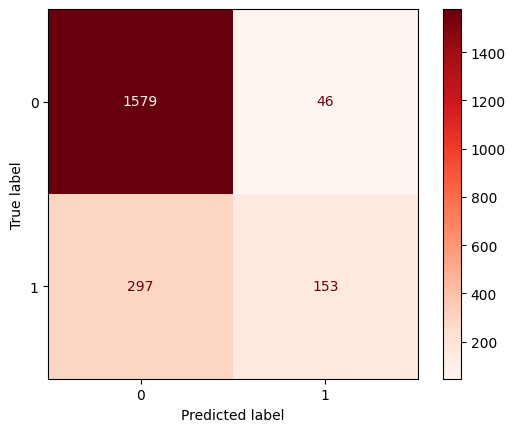

In [52]:
# Model Training - Train Set logistic Regression

# Prediksi pada Train-Set
y_pred_train_logreg = log_reg.predict(X_train)

# Evaluasi model pada Train-Set
print('F1 Score - Train Set (Logistic Regression)  : ', f1_score(y_train, y_pred_train_logreg), '\n')
print('Classification Report (Logistic Regression) : \n', classification_report(y_train, y_pred_train_logreg), '\n')
print('Confusion Matrix (Logistic Regression)      : \n')
ConfusionMatrixDisplay.from_estimator(log_reg, X_train, y_train, cmap='Reds')
plt.show()


Insight:

- F1 Score untuk kelas default (1) adalah 0.47, yang menunjukkan keseimbangan antara precision dan recall untuk kelas minoritas ini.
- Model memiliki akurasi 83%, yang berarti bahwa model ini benar dalam 83% kasus pada data train-set.
- Confusion Matrix menunjukkan bahwa meskipun model cukup baik dalam mengidentifikasi kasus non-default (kelas 0), model ini memiliki banyak kesalahan dalam mengidentifikasi kasus default (kelas 1), yang tercermin dalam tingginya jumlah False Negatives (297)


F1 Score - Train Set (KNN)  :  0.5303867403314917 

Classification Report (KNN) : 
               precision    recall  f1-score   support

           0       0.86      0.95      0.90      1625
           1       0.70      0.43      0.53       450

    accuracy                           0.84      2075
   macro avg       0.78      0.69      0.72      2075
weighted avg       0.82      0.84      0.82      2075
 

Confusion Matrix (KNN)      : 



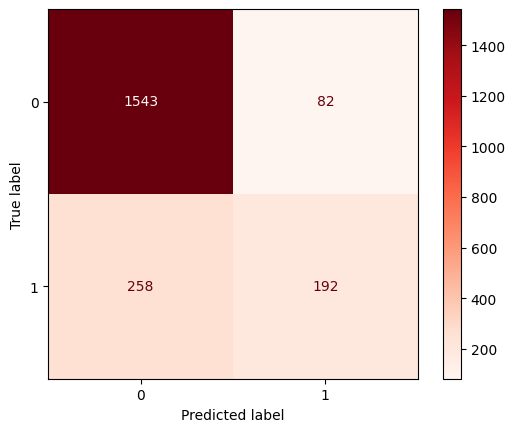

In [53]:
# Model Training - Train Set K-Nearest Neighbors (KNN)

# Prediksi pada Train-Set
y_pred_train_knn = knn.predict(X_train)

# Evaluasi model pada Train-Set
print('F1 Score - Train Set (KNN)  : ', f1_score(y_train, y_pred_train_knn), '\n')
print('Classification Report (KNN) : \n', classification_report(y_train, y_pred_train_knn), '\n')
print('Confusion Matrix (KNN)      : \n')
ConfusionMatrixDisplay.from_estimator(knn, X_train, y_train, cmap='Reds')
plt.show()

Insight:

- F1 Score untuk kelas default (1) adalah 0.53, yang menunjukkan keseimbangan yang lebih baik antara precision dan recall untuk kelas minoritas ini dibandingkan dengan model Logistic Regression.
- Confusion Matrix menunjukkan bahwa model KNN lebih baik dalam mengidentifikasi kasus default (kelas 1) dibandingkan model Logistic Regression, yang tercermin dalam jumlah False Negatives yang lebih rendah (258 dibandingkan 297) dan jumlah True Positives yang lebih tinggi (192 dibandingkan 153).
- Tapi, model ini masih butuh improvement perbaikan dalam mendeteksi lebih banyak kasus default secara akurat.

F1 Score - Train Set (SVC)  :  0.0 

Classification Report (SVC) : 
               precision    recall  f1-score   support

           0       0.78      1.00      0.88      1625
           1       0.00      0.00      0.00       450

    accuracy                           0.78      2075
   macro avg       0.39      0.50      0.44      2075
weighted avg       0.61      0.78      0.69      2075
 

Confusion Matrix (SVC)      : 



c:\Users\hp\.conda\envs\iznia\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hp\.conda\envs\iznia\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hp\.conda\envs\iznia\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


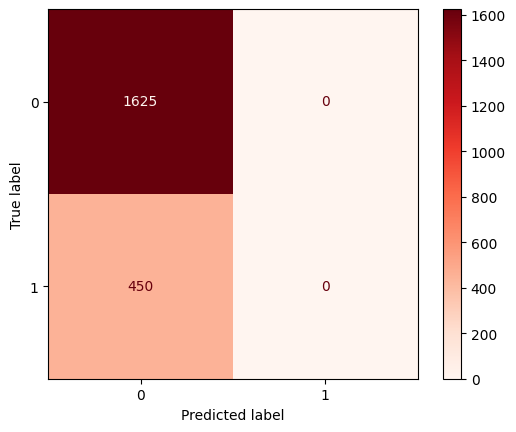

In [54]:
# Model Training - Train Set Support Vector Classifier (SVC)

# Prediksi pada Train-Set
y_pred_train_svc = svc.predict(X_train)

# Evaluasi model pada Train-Set
print('F1 Score - Train Set (SVC)  : ', f1_score(y_train, y_pred_train_svc), '\n')
print('Classification Report (SVC) : \n', classification_report(y_train, y_pred_train_svc), '\n')
print('Confusion Matrix (SVC)      : \n')
ConfusionMatrixDisplay.from_estimator(svc, X_train, y_train, cmap='Reds')
plt.show()

Insight:

- F1 Score untuk kelas default (1) adalah 0.0, yang menunjukkan bahwa model ini tidak mampu mendeteksi kelas minoritas (default) sama sekali.
- Model SVC tidak mampu mendeteksi kasus default (kelas 1) sama sekali, yang tercermin dalam F1 Score dan recall yang sangat rendah untuk kelas ini. Model ini cenderung mengklasifikasikan semua sampel sebagai non-default (kelas 0), yang menyebabkan ketidakseimbangan dalam performa deteksi antara kedua kelas. Hal ini menunjukkan bahwa model SVC memerlukan tuning atau penyesuaian lebih lanjut untuk dapat mendeteksi kasus default dengan lebih baik.


**Kesimpulan dari ketiga baseline model  di atas:**

Berdasarkan hasil Training Model, diperoleh:
- Logistic Regression:
    - Recall: 0.34
    - F1 Score: 0.47
- KNN:
    - Recall: 0.43
    - F1 Score: 0.53
- SVC:
    - Recall: 0.00
    - F1 Score: 0.00

Dalam kasus ini, KNN menunjukkan performa terbaik dengan **Recall 0.43** dan **F1 Score 0.53**.

#### **ii. Training dengan Cross Validation**

Untuk training dengan Cross Validation, berdasarkan analisis di atas dan hasil training model, akan menggunakan metrik **F1 Score**. Karena **F1 Score** tampaknya lebih sesuai karena memberikan keseimbangan antara menangkap sampel positif dan akurasi dalam prediksi positifnya. Ini membantu memastikan bahwa model tidak hanya menemukan sampel positif tetapi juga meminimalkan jumlah False Positives, sehingga memberikan performa yang lebih andal secara keseluruhan.

Selanjutnya, model akan di training dengan **Cross Validation** untuk membantu mengurangi overfitting. Dengan menggunakan cross-validation, data pelatihan dibagi menjadi beberapa subset (folds). Model dilatih pada 𝑘 - 1 folds dan divalidasi pada fold yang tersisa. Proses ini diulang sebanyak 𝑘 kali (dimana 𝑘 adalah jumlah folds).

Pada setiap model, Cross Validation yang digunakan dengan 5 folds (cv=5). Oleh karena itu, dataset pelatihan dibagi menjadi 5 subset, dan proses pelatihan diulang hingga mencapai skor terbaik.

**a. Logistic Regression**

In [55]:
# Perform cross-validation with cv=5
cv_results_log_reg = cross_val_score(pipe_log, 
                                     X_train, 
                                     y_train, 
                                     cv=5, 
                                     scoring='f1', 
                                     n_jobs=-1) 


# Print results for Logistic Regression
print('Logistic Regression:')
print('F1 Score - All - Cross Validation (Train) : ', cv_results_log_reg)
print('F1 Score - Mean - Cross Validation (Train) : ', cv_results_log_reg.mean())
print('F1 Score - Std - Cross Validation (Train) : ', cv_results_log_reg.std())
print('F1 Score - Range of Train-Set : ', cv_results_log_reg.mean() - cv_results_log_reg.std(), '-', cv_results_log_reg.mean() + cv_results_log_reg.std())

Logistic Regression:
F1 Score - All - Cross Validation (Train) :  [0.43902439 0.47692308 0.40983607 0.47619048 0.38461538]
F1 Score - Mean - Cross Validation (Train) :  0.4373178787093221
F1 Score - Std - Cross Validation (Train) :  0.03637407230167989
F1 Score - Range of Train-Set :  0.4009438064076422 - 0.473691951011002


Insight:
- Standar deviasi dari F1 Score adalah 0.0363. Ini menunjukkan bahwa variasi performa model antar lipatan cross-validation relatif kecil.
- Rentang nilai F1 Score adalah dari 0.4009 hingga 0.4736. Rentang ini menunjukkan sejauh mana performa model dapat bervariasi tergantung pada subset data yang digunakan.

Insight ini menunjukkan bahwa model Logistic Regression memiliki performa yang cukup konsisten pada data training, dengan variasi yang relatif kecil di antara lipatan cross-validation. Namun, performa rata-rata F1 Score sekitar 0.4373 mengindikasikan bahwa model ini mungkin memerlukan perbaikan lebih lanjut untuk meningkatkan deteksi kelas positif.

**b. KNN**

In [56]:
# Perform cross-validation with cv=5
cv_results_knn = cross_val_score(pipe_knn, 
                                 X_train, 
                                 y_train, 
                                 cv=5, 
                                 scoring='f1', 
                                 n_jobs=-1) 


# Print results for Logistic Regression
print('Logistic Regression:')
print('F1 Score - All - Cross Validation (Train) : ', cv_results_knn)
print('F1 Score - Mean - Cross Validation (Train) : ', cv_results_knn.mean())
print('F1 Score - Std - Cross Validation (Train) : ', cv_results_knn.std())
print('F1 Score - Range of Train-Set : ', cv_results_knn.mean() - cv_results_knn.std(), '-', cv_results_knn.mean() + cv_results_knn.std())

Logistic Regression:
F1 Score - All - Cross Validation (Train) :  [0.45390071 0.51572327 0.48684211 0.45637584 0.44897959]
F1 Score - Mean - Cross Validation (Train) :  0.4723643031372354
F1 Score - Std - Cross Validation (Train) :  0.025428278788637435
F1 Score - Range of Train-Set :  0.4469360243485979 - 0.49779258192587283


Insight:

Model Logistic Regression menunjukkan F1 Score untuk cross-validation (Train) dengan rata-rata sebesar 0.4373 dan standar deviasi sebesar 0.0363. F1 Score berkisar dari 0.4009 hingga 0.4737. Ini mengindikasikan bahwa model Logistic Regression memiliki performa yang sedang, dengan beberapa variasi dalam prediksi di berbagai lipatan data.

**c. SVC**

In [57]:
# Perform cross-validation with cv=5
cv_results_svc = cross_val_score(pipe_svc, 
                                 X_train, 
                                 y_train, 
                                 cv=5, 
                                 scoring='f1', 
                                 n_jobs=-1) 


# Print results for Logistic Regression
print('Logistic Regression:')
print('F1 Score - All - Cross Validation (Train) : ', cv_results_svc)
print('F1 Score - Mean - Cross Validation (Train) : ', cv_results_svc.mean())
print('F1 Score - Std - Cross Validation (Train) : ', cv_results_svc.std())
print('F1 Score - Range of Train-Set : ', cv_results_svc.mean() - cv_results_svc.std(), '-', cv_results_svc.mean() + cv_results_svc.std())

Logistic Regression:
F1 Score - All - Cross Validation (Train) :  [0.49253731 0.53793103 0.54545455 0.50381679 0.42028986]
F1 Score - Mean - Cross Validation (Train) :  0.5000059084671467
F1 Score - Std - Cross Validation (Train) :  0.04456196969536431
F1 Score - Range of Train-Set :  0.45544393877178235 - 0.544567878162511


Insight:

Model KNN menampilkan F1 Score yang sedikit lebih tinggi untuk cross-validation (Train) dengan rata-rata sebesar 0.4723 dan standar deviasi sebesar 0.0254. F1 Score berkisar dari 0.4469 hingga 0.4978. Ini menunjukkan bahwa model KNN berkinerja lebih baik dibandingkan dengan model Logistic Regression, dengan rentang yang relatif lebih kecil dan variabilitas yang lebih rendah dalam performanya di berbagai lipatan data.

## **9. Model Evaluation**


##### **1. Cross Validation Evaluation**

Pertama, diperlukan identifikasi best model dari ketiga model (KNN, SVC, Logistic Regression) setelah performing cross-validation. Ketiga model akan dibandingkan dan dipilih model terbaik berdasarkan average dari 5 cross-validation. 

In [58]:
# Initialize variables to store the best model information
best_model_name = ''
best_model_score = 0

# Evaluate each model's cross-validation results
for cv_results, name in zip([cv_results_log_reg, cv_results_knn, cv_results_svc], 
                            ['Logistic Regression', 'KNN', 'SVC']):
    
    print(name)
    print('F1 Score - All - Cross Validation', cv_results)
    print('F1 Score - Mean - Cross Validation', cv_results.mean())
    print('-'*50)
    mean_f1_score = cv_results.mean()
    if mean_f1_score > best_model_score:
        best_model_score = mean_f1_score
        best_model_name = name

print('Best Model:', best_model_name)
print('Cross Validation Mean F1 Score from Best Model:', best_model_score)


Logistic Regression
F1 Score - All - Cross Validation [0.43902439 0.47692308 0.40983607 0.47619048 0.38461538]
F1 Score - Mean - Cross Validation 0.4373178787093221
--------------------------------------------------
KNN
F1 Score - All - Cross Validation [0.45390071 0.51572327 0.48684211 0.45637584 0.44897959]
F1 Score - Mean - Cross Validation 0.4723643031372354
--------------------------------------------------
SVC
F1 Score - All - Cross Validation [0.49253731 0.53793103 0.54545455 0.50381679 0.42028986]
F1 Score - Mean - Cross Validation 0.5000059084671467
--------------------------------------------------
Best Model: SVC
Cross Validation Mean F1 Score from Best Model: 0.5000059084671467


In [59]:
# Bisa juga dengan cara seperti ini

# Identify the best model based on F1 Score
models = {
    'Logistic Regression': cv_results_log_reg.mean(),
    'KNN': cv_results_knn.mean(),
    'SVC': cv_results_svc.mean()
}

best_model_name = max(models, key=models.get)
best_model_score = models[best_model_name]

print('\nBest Model:', best_model_name)
print('Cross Validation Mean F1 Score from Best Model:', best_model_score)


Best Model: SVC
Cross Validation Mean F1 Score from Best Model: 0.5000059084671467


Insight: 

Dari hasil tersebut, SVC memiliki F1 Score rata-rata tertinggi, yaitu 0.5000059, dibandingkan dengan Logistic Regression dan KNN. Oleh karena itu, model **SVC** dipilih sebagai model terbaik berdasarkan hasil cross-validation ini.

Logistic Regression dan KNN memiliki performa yang lebih rendah dibandingkan dengan SVC, tetapi masih cukup kompetitif.

**((Optional))**

Setelah didapatkan model terbaik (SVC). Selanjutnya bisa menghitung metrik evaluasi pada test set untuk melihat bagaimana performa model pada data yang belum pernah dilihat.

F1 Score - Test Set (SVC)   :  0.4965986394557823 

Classification Report (SVC) : 
               precision    recall  f1-score   support

           0       0.86      0.95      0.90       705
           1       0.67      0.39      0.50       185

    accuracy                           0.83       890
   macro avg       0.76      0.67      0.70       890
weighted avg       0.82      0.83      0.82       890
 

Confusion Matrix (SVC)      : 



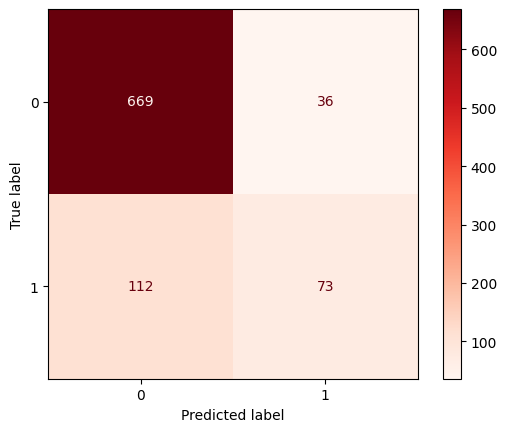

In [60]:
# Evaluate the best model (SVC) on the test set
pipe_svc.fit(X_train, y_train)
y_pred_test_svc = pipe_svc.predict(X_test)

# Evaluate the model on the test set
from sklearn.metrics import f1_score, classification_report, ConfusionMatrixDisplay

# Print F1 Score for test set
print('F1 Score - Test Set (SVC)   : ', f1_score(y_test, y_pred_test_svc), '\n')

# Print Classification Report
print('Classification Report (SVC) : \n', classification_report(y_test, y_pred_test_svc), '\n')

# Print Confusion Matrix
print('Confusion Matrix (SVC)      : \n')
ConfusionMatrixDisplay.from_estimator(pipe_svc, X_test, y_test, cmap='Reds')
plt.show()


Insight:

**1. F1 Score:**
- F1 Score pada test set adalah 0.50, yang menunjukkan keseimbangan antara precision dan recall.
Ini berarti bahwa model SVC memiliki performa yang cukup baik dalam menangani data test, tetapi masih ada ruang untuk peningkatan.

**2. Classification Report**:
- F1 Score untuk kelas 0 adalah 0.90 dan untuk kelas 1 adalah 0.50.
- Model memiliki precision yang lebih tinggi untuk kelas 0 dibandingkan dengan kelas 1, yang berarti model lebih baik dalam mengidentifikasi non-default pelanggan dibandingkan dengan default pelanggan.
- Recall yang lebih rendah untuk kelas 1 menunjukkan bahwa model kesulitan dalam mendeteksi semua pelanggan yang akan default.
- Akurasi keseluruhan model cukup baik, tetapi F1 score untuk kelas 1 yang rendah menunjukkan bahwa model tidak seimbang dalam mendeteksi kedua kelas dengan baik.

**3. Confusion Matrix:**
- True Positives (TP): 73 
- True Negatives (TN): 669 
- False Positives (FP): 36 (Jumlah prediksi salah untuk kelas 1 yang sebenarnya kelas 0)
- False Negatives (FN): 112 (Jumlah prediksi salah untuk kelas 0 yang sebenarnya kelas 1)

*Analisis*
- Model memiliki jumlah FN yang cukup tinggi (112), yang berarti banyak pelanggan yang sebenarnya akan default tetapi tidak terdeteksi oleh model.
- Tingginya jumlah TN (669) menunjukkan bahwa model sangat baik dalam mengidentifikasi pelanggan yang tidak akan default.
- Jumlah FP (36) relatif rendah, yang berarti model jarang salah mengidentifikasi pelanggan non-default sebagai default.


Kesimpulan:

1. Model SVC cukup baik dalam mendeteksi pelanggan non-default tetapi kurang baik dalam mendeteksi pelanggan yang akan default.
2. Ini bisa berisiko dalam aplikasi dunia nyata karena kegagalan untuk mendeteksi default dapat mengakibatkan kerugian finansial.
3. Perlu dilakukan tuning lebih lanjut atau mempertimbangkan model lain yang mungkin lebih seimbang dalam mendeteksi kedua kelas.


##### **2. Best Model Evaluation**

Selajutnya akan dilakukan evaluasi model yang dipilih sebelumnya yaitu KNN. Model ini akan dilatih menggunakan `X_train` dan `y_train`.

In [61]:
# Sesuaikan pipeline training data
pipe_svc.fit(X_train, y_train)

c:\Users\hp\.conda\envs\iznia\Lib\site-packages\sklearn\compose\_column_transformer.py:1624: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['limit_balance'])])),
                ('svc', SVC(probability=True))])

In [62]:
# Prediksi unutk training and test data
y_pred_train = pipe_svc.predict(X_train)
y_pred_test = pipe_svc.predict(X_test)

In [63]:
# Print F1 score
print('F1 Score - Train Set  : ', f1_score(y_train, y_pred_train))
print('F1 Score - Test Set   : ', f1_score(y_test, y_pred_test))

F1 Score - Train Set  :  0.5289017341040463
F1 Score - Test Set   :  0.4965986394557823


Nilai F1 Score untuk train set adalah 0.5289, sedangkan untuk test set adalah 0.4966. Perbedaan antara nilai F1 Score untuk train set dan test set cukup kecil, yang menunjukkan bahwa model tidak overfitting atau underfitting secara signifikan.

Namun, nilai F1 Score masih jauh dari skor maksimal 1.0, yang mengindikasikan bahwa model belum optimal dan masih perlu peningkatan. 

Untuk evaluasi lebih lanjut, digunakan confusion matrix untuk menampilkan jumlah True Positive, True Negative, False Positive, dan False Negative.

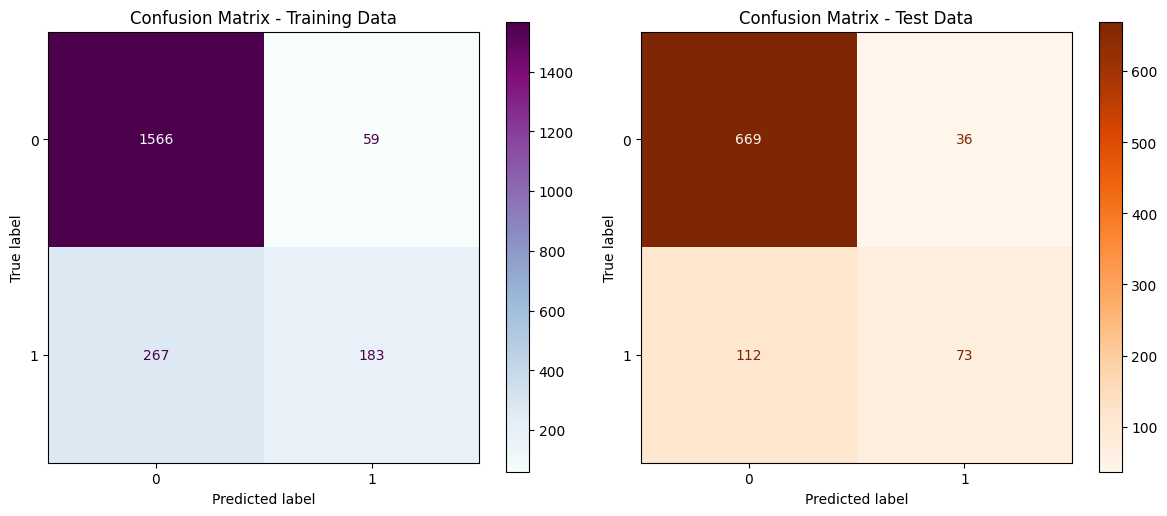

In [64]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot confusion matrix for training data
train_matrix = ConfusionMatrixDisplay.from_estimator(pipe_svc, X_train, y_train, cmap='BuPu', ax=axes[0])
train_matrix.ax_.set_title('Confusion Matrix - Training Data')

# Plot confusion matrix for test data
test_matrix = ConfusionMatrixDisplay.from_estimator(pipe_svc, X_test, y_test, cmap='Oranges', ax=axes[1])
test_matrix.ax_.set_title('Confusion Matrix - Test Data')

plt.tight_layout()
plt.show()

Insight:

**a. Confusion Matrix - Training Data:**
- True Positives (TP): 183. Model berhasil memprediksi 183 sampel kelas 1 (positive) dengan benar. 
- True Negatives (TN): 1566. Model berhasil memprediksi 1566 sampel kelas 0 (negative) dengan benar.
- False Positives (FP): 59. Model salah memprediksi 59 sampel kelas 0 (negative) sebagai kelas 1 (positive).
- False Negatives (FN): 267. Model salah memprediksi 267 sampel kelas 1 (positive) sebagai kelas 0 (negative).

**b. Confusion Matrix - Test Data:**
- True Positives (TP): 73. Model berhasil memprediksi 73 sampel kelas 1 (positive) dengan benar.
- True Negatives (TN): 669. Model berhasil memprediksi 669 sampel kelas 0 (negative) dengan benar.
- False Positives (FP): 36. Model salah memprediksi 36 sampel kelas 0 (negative) sebagai kelas 1 (positive).
- False Negatives (FN): 112. Model salah memprediksi 112 sampel kelas 1 (positive) sebagai kelas 0 (negative).

Model menunjukkan performa yang baik dalam mengidentifikasi True Negative (TN) dengan jumlah yang cukup tinggi, tetapi memiliki jumlah FN yang relatif tinggi, menunjukkan bahwa model kesulitan dalam mendeteksi kelas positif dengan baik.

Model saat ini lebih baik dalam mengidentifikasi pelanggan yang tidak akan gagal membayar (TN tinggi), tetapi kesulitan dalam mendeteksi pelanggan yang akan gagal membayar (FN tinggi). Langkah perbaikan seperti **hyperparameter tuning** diperlukan untuk mengurangi jumlah false negatives dan meningkatkan kemampuan model dalam mendeteksi risiko gagal bayar, sehingga bank dapat mengambil tindakan pencegahan yang lebih tepat.

In [65]:
# Create function to create reports
def performance_report(all_reports, y_train, y_pred_train, y_test, y_pred_test, name):
    # Calculate f1_score scores
    score_reports = {
        'F1 Score - Train Set': f1_score(y_train, y_pred_train),
        'F1 Score - Test Set': f1_score(y_test, y_pred_test),
    }

    # Calculate confusion matrices for train and test sets
    cm_train = confusion_matrix(y_train, y_pred_train)
    cm_test = confusion_matrix(y_test, y_pred_test)
    
    # Extract false negatives from the confusion matrices and add to the report
    score_reports['False Negative Train'] = cm_train[1, 0]
    score_reports['False Negative Test'] = cm_test[1, 0]
    score_reports['False Positive Train'] = cm_train[0, 1]
    score_reports['False Positive Test'] = cm_test[0, 1]
    
    # Store the report in the dictionary with the specified model name
    all_reports[name] = score_reports
    return all_reports

all_reports = {}
all_reports = performance_report(all_reports, y_train, y_pred_train, y_test, y_pred_test, 'SVM without Tuning')

# Display Dataframe
pd.DataFrame(all_reports)

,SVM without Tuning
F1 Score - Train Set,0.528902
F1 Score - Test Set,0.496599
False Negative Train,267.000000
False Negative Test,112.000000
False Positive Train,59.000000
False Positive Test,36.000000


Model SVM tanpa tuning menunjukkan F1 Score yang hanya mengidentifikasi sebesar 0.528902 atau sebesar 52.9% pada train set dan 0.496599 atau 49.6% pada test set dari actual defaultsnya. Ini berarti bahwa model memiliki keseimbangan yang wajar antara precision dan recall.

Nilai F1 Score yang sedikit lebih rendah pada test set dibandingkan dengan train set menunjukkan bahwa model tidak terlalu `overfitting`, meskipun ada sedikit penurunan performa pada data yang tidak dilatih sebelumnya.

Jumlah false negatives yang cukup tinggi baik pada train set (267) maupun test set (112) menunjukkan bahwa model sering gagal mendeteksi instance positif. Ini bisa menjadi masalah serius dalam aplikasi seperti deteksi penyakit atau penipuan, di mana missing instance positif dapat berakibat fatal.

##### **3. Hyperparameter Tuning**


Karena model ini masih memerlukan beberapa improvement, langkah selanjutnya melibatkan  hyperparameter Tuning untuk model SVC menggunakan `GridSearchCV`.

Empat parameter yang digunakan untuk tuning yaitu:
- `C` : Mencerminkan kekuatan regularisasi; nilai yang lebih rendah akan menghasilkan regularisasi yang lebih kuat, sehingga memberikan sanksi yang lebih besar terhadap kesalahan klasifikasi. 
- `Gamma` : Mempengaruhi dampak dari satu contoh pelatihan; nilai yang lebih kecil akan memperluas radius pengaruh vektor pendukung, sehingga menghasilkan batasan keputusan yang lebih halus. 
- `Kernel` : Memengaruhi bentuk batas keputusan dan kemampuan model untuk menangkap hubungan data yang kompleks.
- `Class Weight` : Mengatasi ketidakseimbangan kelas dengan menetapkan bobot yang bervariasi ke kelas yang berbeda. 

In [66]:
# Define the parameter grid
param_grid = {
    'svc__C': [0.1, 1, 10],
    'svc__gamma': [1, 0.1, 0.01, 'auto'],
    'svc__kernel': ['linear', 'rbf', 'sigmoid'],
    'svc__class_weight': [None, 'balanced']
}


In [67]:
# Set up the GridSearchCV object
grid_search = GridSearchCV(pipe_svc,
                           param_grid=param_grid,
                           scoring='f1',
                           cv=5,
                           verbose=2,
                           n_jobs=-1)


In [68]:
# Fit GridSearchCV
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


c:\Users\hp\.conda\envs\iznia\Lib\site-packages\sklearn\compose\_column_transformer.py:1624: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['limit_balance'])])),
                                       ('svc', SVC(probability=True))]),
             n_jobs=-1,
             param_grid={'svc__C': [0.1, 1, 10],
                         'svc__class_weight': [None, 'balanced'],
                         'svc__gamma': [1, 0.1, 0.01, 'auto'],
                         'svc__kernel': ['linear', 'rbf', 'sigmoid']},
             scoring='f1', verbose=2)

In [69]:

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best F1 Score:", best_score)

Best Hyperparameters: {'svc__C': 0.1, 'svc__class_weight': 'balanced', 'svc__gamma': 0.01, 'svc__kernel': 'sigmoid'}
Best F1 Score: 0.543161923676134


Insight: 

- Best Hyperparameters:
    - svc__C: `0.1`
    - svc__class_weight: `'balanced'`
    - svc__gamma: `0.01`
    - svc__kernel: `'sigmoid'`
- Best F1 Score: `0.543161923676134`

F1 Score terbaik yang dicapai adalah **0.543.** Ini menunjukkan adanya keseimbangan yang lebih baik antara precision dan recall. Dengan F1 Score yang lebih tinggi dibandingkan model sebelumnya, dapat disimpulkan bahwa tuning hyperparameter telah meningkatkan kemampuan model untuk menangani trade-off antara false positives dan false negatives.

Meskipun ada peningkatan, masih bisa dilakukan perbaikan lebih lanjut. Pendekatan lain seperti *ensemble methods, feature engineering tambahan*, atau penggunaan model yang lebih kompleks seperti *gradient boosting* dapat dieksplorasi untuk mencapai performa yang lebih baik.

In [70]:
# Save best model to a variale
best_svm = grid_search.best_estimator_

In [71]:
# Get predictions for training and testing set using the hyperparameter tuned model
y_pred_train_tuned = best_svm.predict(X_train)
y_pred_test_tuned = best_svm.predict(X_test)

In [72]:
# Show result after hyperparameter tuning
print('F1 Score - Train Set  : ', f1_score(y_train, y_pred_train_tuned))
print('F1 Score - Test Set   : ', f1_score(y_test, y_pred_test_tuned))

F1 Score - Train Set  :  0.5584562996594779
F1 Score - Test Set   :  0.553763440860215


Insight: Setelah melakukan hyperparameter tuning, F1 score meningkat cukup signifikan yaitu dengan Train Set sebesar **0.5584** dan Test Set sebesar **0.5537**. Peningkatan ini menunjukkan bahwa model telah diperbaiki dan lebih baik dalam menangkap pola yang relevan dalam data.

Walaupun modelnya masih mungkin dianggap **underfit** (dengan **F1 Score < 0.7**), peningkatan dari model dasar menunjukkan bahwa tuning hyperparameter telah mengurangi underfitting dan meningkatkan performa model.

Langkah selanjutnya adalah menampilkan **confusion matrix** untuk set pelatihan dan pengujian untuk menilai pengurangan False Negatives, yang dapat memberikan gambaran lebih rinci tentang performa model yang telah ditingkatkan.



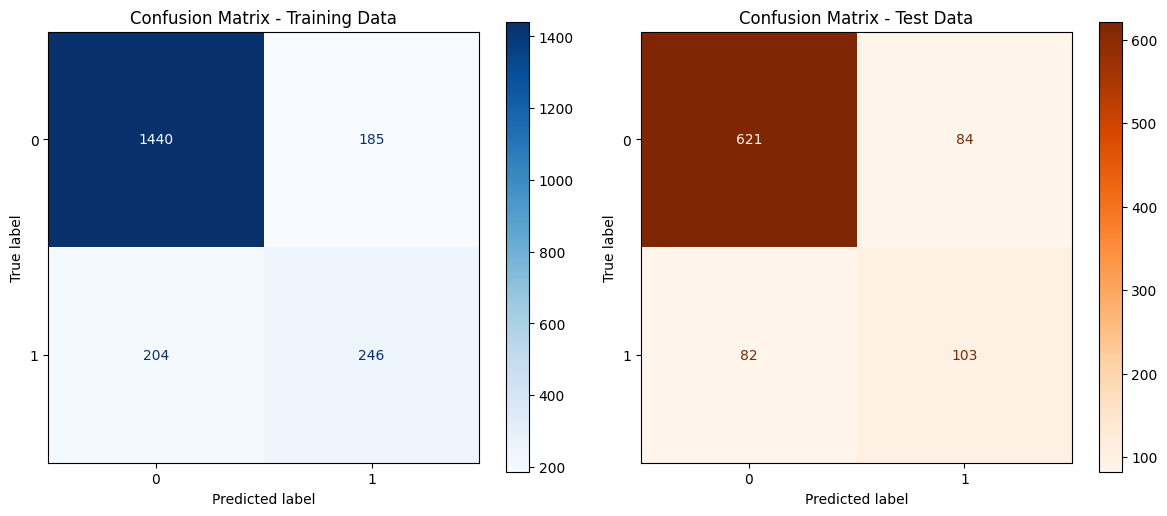

In [73]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot confusion matrix for training data
train_matrix_tuned = ConfusionMatrixDisplay.from_estimator(best_svm, X_train, y_train, cmap='Blues', ax=axes[0])
train_matrix_tuned.ax_.set_title('Confusion Matrix - Training Data')

# Plot confusion matrix for test data
test_matrix_tuned = ConfusionMatrixDisplay.from_estimator(best_svm, X_test, y_test, cmap='Oranges', ax=axes[1])
test_matrix_tuned.ax_.set_title('Confusion Matrix - Test Data')

plt.tight_layout()
plt.show()

Insight: 

**1. Confusion Matrix - Training Data**

- True Positives (TP): 246. 
- True Negatives (TN): 1440. 
- False Positives (FP): 185. Model salah memprediksi 185 instance sebagai positif.
- False Negatives (FN): 204. Model salah memprediksi 204 instance sebagai negatif.
- Model bekerja cukup baik pada data training, tetapi masih terdapat sejumlah false positives dan false negatives yang signifikan.

**2. Confusion Matrix - Test Data**

- True Positives (TP): 103. Model berhasil memprediksi 103 instance sebagai positif.
- True Negatives (TN): 621. Model berhasil memprediksi 621 instance sebagai negatif.
- False Positives (FP): 84. Model salah memprediksi 84 instance sebagai positif.
- False Negatives (FN): 82. Model salah memprediksi 82 instance sebagai negatif.
- Performa model pada data test menunjukkan proporsi yang seimbang antara false positives dan false negatives, mengindikasikan generalisasi yang baik namun tetap menunjukkan area yang perlu diperbaiki.

Setelah dilakukan hyperparameter dilakukan dengan Confusion Matrix, FN mengalami penurunan menjadi 204 pada data training dan 82 pada data test. Setelah tuning, model menunjukkan peningkatan dalam mendeteksi positif baik pada data training maupun test, yang terlihat dari penurunan false negatives. Ini menunjukkan bahwa model menjadi lebih sensitif terhadap deteksi positif. 

Peningkatan false positives setelah tuning merupakan trade-off yang perlu diperhatikan. Meskipun model lebih baik dalam mendeteksi positif, model juga cenderung menghasilkan lebih banyak false positives.

In [74]:
# Add results to the previous table
all_reports = performance_report(all_reports, y_train, y_pred_train_tuned, y_test, y_pred_test_tuned, 'SVM with Tuning')

pd.DataFrame(all_reports)

,SVM without Tuning,SVM with Tuning
F1 Score - Train Set,0.528902,0.558456
F1 Score - Test Set,0.496599,0.553763
False Negative Train,267.000000,204.000000
False Negative Test,112.000000,82.000000
False Positive Train,59.000000,185.000000
False Positive Test,36.000000,84.000000


Insight:

Setelah melakukan tuning pada model SVM, model menunjukkan peningkatan signifikan dalam kemampuannya untuk mendeteksi false negatives, yang mengindikasikan kemampuan yang lebih kuat dalam mengidentifikasi instance positif dengan benar. Peningkatan ini menunjukkan bahwa model yang telah di-tuning telah mengoptimalkan pengaturannya untuk tampil baik tidak hanya pada data train tetapi juga pada data baru yang belum pernah dilihat sebelumnya, yang mengurangi risiko **overfitting** jadi lebih rendah.

## **10. Model Saving**


Dengan melihat hasil Model Evaluation, model SVM dengan tuning parameter merupakan model terbaik yang akan disimpan. Model ini akan digunakan kembali dalam melakukan Model Inference dan Model Deployment. 

Best model terpilih akan disimpan ke dalam file '.pkl' terutama yang menggunakan pipeline. 

In [75]:
# Saving num_columns, cat_columns, dan best model terpilih

with open('list_num_cols.txt', 'w') as file_1:
  json.dump(num_columns, file_1)

with open('list_cat_cols.txt', 'w') as file_2:
  json.dump(cat_columns, file_2)

# Save the best model
with open('best_svm_model.pkl', 'wb') as model_file:
  pickle.dump(best_svm, model_file)


In [76]:
# Memuat kembali model terbaik untuk verifikasi aja
with open('best_svm_model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)
print("Model terbaik yang dimuat kembali:", loaded_model)

Model terbaik yang dimuat kembali: Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['limit_balance'])])),
                ('svc',
                 SVC(C=0.1, class_weight='balanced', gamma=0.01,
                     kernel='sigmoid', probability=True))])


## **11. Model Inference**


#### **i. Libraries**

In [77]:
# Import Libraries

import json
import pickle
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC

#### **ii. Data Loading**

In [78]:
# Load Files
with open('list_num_cols.txt', 'r') as file_1:
    list_cat_cols = json.load(file_1)

with open('list_cat_cols.txt', 'r') as file_2:
    list_num_cols = json.load(file_2)


# Load model
with open('best_svm_model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

In [79]:
# Define preprocessor (ini harus sama dengan preprocessor yang digunakan pada saat trianing)
numeric_transformer = StandardScaler()
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, list_num_cols)
    ],
    remainder='passthrough')

# Fit preprocessor on the training data
preprocessor.fit(X_train)

c:\Users\hp\.conda\envs\iznia\Lib\site-packages\sklearn\compose\_column_transformer.py:1624: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('num', StandardScaler(),
                                 ['education_level', 'pay_0', 'pay_2', 'pay_3',
                                  'pay_4', 'pay_5', 'pay_6'])])

#### **iii. Inferencing**

In [80]:
# Create new data
# Contoh data baru untuk inference
data_inf = pd.DataFrame({
    'limit_balance': [30000, 50000],
    'education_level': [2, 3],
    'pay_0': [0, -1],
    'pay_2': [0, -1],
    'pay_3': [0, -1],
    'pay_4': [0, -1],
    'pay_5': [0, -1],
    'pay_6': [0, -1]
})

data_inf


,limit_balance,education_level,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6
0,30000,2,0,0,0,0,0,0
1,50000,3,-1,-1,-1,-1,-1,-1


#### **iv. Model Prediction**

In [81]:
# Preprocessing data baru
data_inf_transformed = preprocessor.transform(data_inf)
data_inf_transformed = pd.DataFrame(data_inf_transformed, columns=list_num_cols + list_cat_cols)

# Lakukan prediksi pada data baru
y_pred_inf = loaded_model.predict(data_inf_transformed)

In [82]:
# Display predictions
for i, pred in enumerate(y_pred_inf):
    if pred == 0:
        print(f'Prediction for entry {i}: Non-Default')
    else:
        print(f'Prediction for entry {i}: Default')

Prediction for entry 0: Non-Default
Prediction for entry 1: Non-Default


Dalam konteks model yang di training, variabel `y` merepresentasikan status pembayaran default atau non-default dari nasabah. 

Hasil prediksi dari model SVM menunjukkan bahwa kedua entri dalam data inferensi diprediksi sebagai **"Non-Default"**. Berarti model memperkirakan bahwa nasabah tersebut akan mampu membayar pinjamannya tepat waktu tanpa mengalami gagal bayar. Sebaliknya, prediksi "Default" menunjukkan bahwa model memperkirakan nasabah tersebut berisiko mengalami gagal bayar.

Jika kedua entri dalam data inferensi diprediksi sebagai "Non-Default", artinya model memperkirakan bahwa kedua nasabah dalam data inferensi tersebut akan melakukan pembayaran tepat waktu tanpa mengalami gagal bayar.

Selanjutnya coba untuk melakukan probabilitas, ini membantu dalam memahami tingkat kepercayaan model terhadap setiap prediksi dan bisa digunakan untuk membuat keputusan yang lebih informatif berdasarkan hasil prediksi.

In [83]:
# Lakukan prediksi probabilitas pada data baru
y_pred_prob = loaded_model.predict_proba(data_inf_transformed)

# Tampilkan hasil prediksi probabilitas
for i, prob in enumerate(y_pred_prob):
    print(f'Prediction probabilities for entry {i}: {prob}')


Prediction probabilities for entry 0: [0.74385029 0.25614971]
Prediction probabilities for entry 1: [0.87257112 0.12742888]


Insight:

pada data **Entry 0:**, model memprediksi dengan probabilitas sekitar 74.5% bahwa entry 0 tidak akan mengalami default dan sekitar 25.5% bahwa entry 0 akan mengalami default. Karena probabilitas untuk Non-Default lebih tinggi, prediksi akhirnya adalah **Non-Default**. Begitu pula dengan **Entry 1** probability **Non-Default > Default**

jadi, Entry 0 dan Entry 1 keduanya diprediksi sebagai Non-Default berdasarkan probabilitas yang dihitung oleh model.



#### **v. Conclution Inference**

Pada tahap inferencing, model yang telah dilatih digunakan untuk memprediksi data baru yang belum pernah dilihat sebelumnya.

Kesimpulan ini menunjukkan bahwa model memiliki kepercayaan tinggi dalam memprediksi bahwa kedua entri baru ini tidak akan mengalami default. Probabilitas memberikan keyakinan tambahan terhadap hasil prediksi model, membantu memastikan bahwa keputusan berdasarkan prediksi ini lebih informatif dan andal.

## **12. Conceptual Problems**

**1. Apakah yang dimaksud dengan coeficient pada logistic regression?**
    
   **Jawab:**
    
   Koefisien dalam regresi logistik adalah nilai yang menunjukkan seberapa besar pengaruh setiap variabel independen (fitur) terhadap probabilitas hasil dari variabel dependen (kelas). Dalam konteks regresi logistik, koefisien digunakan untuk memperkirakan log odds dari kejadian tertentu.
   - Log Odds: Log odds adalah logaritma dari odds.
    
   Koefisien regresi logistik memberi tahu kita seberapa besar dan ke arah mana sebuah variabel mempengaruhi log odds dari kejadian tertentu. Jika koefisien positif, berarti variabel tersebut meningkatkan log odds dari kejadian tertentu, dan sebaliknya jika koefisien negatif.


**2. Apakah fungsi parameter kernel pada SVM? Jelaskan salah satu kernel yang kalian pahami!**
    
   **Jawab:**

   Fungsi Kernel adalah metode yang digunakan untuk mengambil data sebagai masukan dan mengubahnya menjadi bentuk pemrosesan data yang diperlukan.
   
   Kernel membantu SVM menangani masalah klasifikasi yang tidak linier dengan memetakan data dari ruang berdimensi rendah ke ruang berdimensi lebih tinggi, di mana data tersebut bisa lebih mudah dipisahkan dengan hiperplane linier.
   
   **Type of Kernel**
   - Radial Basis Function (RBF) Kernel

     Salah satu kernel yang sering digunakan adalah `RBF`. Kernel RBF bekerja dengan mengukur jarak antara dua titik data dan mengubahnya menjadi nilai yang lebih tinggi di ruang fitur. Ini membantu dalam memisahkan data yang tidak linier dengan lebih efektif. RBF digunakna ketika hubungan antara kelas sangat kompleks dan tidak linier. RBF kernel sangat fleksibel dan dapat menangani berbagai jenis distribusi data.

   - Polynomial Kernel
      
      Kernel polinomial melakukan pemetaan non-linier dari data ke ruang berdimensi tinggi dengan menggunakan polinomial. Polinomial digunakan ketika hubungan antara kelas tidak linier dan memiliki bentuk polinomial. Contoh, jika kita ingin memisahkan data yang memiliki pola kurva (misalnya, data yang memiliki pola kuadrat).



**3. Bagaimana cara memilih `K` yang optimal pada KNN?**
    
   **Jawab:**

   Memilik K yang optimal pada algoritma K-Nearest Neighbors (KNN) dapat dilakukan dengan cara:
   - **Cross-Validation**. Menggunakan teknik cross-validation adalah salah satu cara yang paling umum dan efektif untuk memilih nilai K yang optimal. Dalam cross-validation, data dibagi menjadi beberapa subset, dan model dilatih dan divalidasi beberapa kali, masing-masing kali dengan subset yang berbeda.
   - **Elbow Method.** Elbow Method adalah teknik visual untuk memilih nilai K yang optimal dengan memplot metrik evaluasi terhadap berbagai nilai K dan mencari "siku" pada grafik, di mana penurunan metrik mulai melambat.
   - **Grid Search.** Grid Search adalah teknik untuk menemukan hyperparameter terbaik dengan mencoba semua kombinasi parameter yang mungkin dan memilih yang memberikan performa terbaik.
   - **Trade-off between Bias and Variance**
      - Nilai K yang kecil: Model dengan K yang kecil (misalnya K=1) cenderung memiliki bias rendah dan varians tinggi, artinya model lebih sensitif terhadap noise pada data dan mungkin overfitting.
      - Nilai K yang besar: Model dengan K yang besar cenderung memiliki bias tinggi dan varians rendah, artinya model lebih general dan mungkin underfitting.


**4. Apa yang dimaksud dengan metrics-metrics berikut : `Accuracy, Precision, Recall, F1 Score`, dan kapan waktu yang tepat untuk menggunakannya?**
    
   **Jawab:**
   Saat mengevaluasi model klasifikasi, ada 4 metrik evaluasi untuk menilai kinerja:

   - **Accuracy**

      Akurasi adalah rasio dari prediksi yang benar terhadap total jumlah prediksi. Akurasi digunakan ketika kita memiliki dataset yang seimbang, yaitu jumlah sampel di setiap kelas hampir sama.
   
   - **Precision**
   
      Presisi adalah rasio dari prediksi benar untuk kelas positif terhadap total jumlah prediksi kelas positif. Presisi digunakan ketika biaya dari false positive tinggi, yaitu ketika salah memprediksi kelas positif lebih merugikan.
      
      *Contoh*: Deteksi email spam, di mana mengidentifikasi email yang bukan spam sebagai spam 
      (false positive) bisa menyebabkan email penting terlewat.
   
   - **Recall**

      Recall adalah rasio dari prediksi benar untuk kelas positif terhadap total jumlah sampel kelas positif. Recall digunakan ketika biaya dari false negative tinggi, yaitu ketika salah memprediksi kelas negatif lebih merugikan.
      
      *Contoh*: Deteksi penyakit, di mana mengidentifikasi orang sakit sebagai sehat (false negative) bisa berakibat fatal.
   
   - **F1 Score**

      F1 Score adalah rata-rata harmonis dari precision dan recall. F1 Score digunakan ketika kita ingin keseimbangan antara precision dan recall, terutama jika kita memiliki dataset yang tidak seimbang. Berguna ketika kita perlu mempertimbangkan baik false positives maupun false negatives.

      *Contoh*: Dalam kasus di mana kita ingin memastikan bahwa kita mendeteksi semua kasus positif tanpa terlalu banyak menghasilkan false positives, F1 score adalah metrik yang tepat.

## **12. Analisis dan Kesimpulan**

#### **a. EDA**

Analisis Data Eksplorasi (EDA) menunjukkan beberapa pola dan wawasan menarik terkait dengan default kartu kredit:
- **Distribusi Limit Balance:** Sebagian besar nasabah memiliki limit balance yang relatif rendah, dengan mayoritas berada di bawah 100.000 NTD.
- **Distribusi Usia:** Data menunjukkan mayoritas nasabah berada dalam rentang usia 30-40 tahun.
- Persentase Default Pembayaran Bulan Depan: 21.4% nasabah diperkirakan akan mengalami default pembayaran pada bulan berikutnya.
- **Pendidikan Nasabah:** Mayoritas nasabah memiliki pendidikan pada level universitas dan pascasarjana.
- **Default Pembayaran Berdasarkan Tingkat Pendidikan:** Tingkat default tertinggi ditemukan pada nasabah dengan pendidikan sekolah menengah dan lain-lain (others).
- **Rata-rata Tagihan Bulanan pada Tahun 2005:** Terjadi peningkatan yang signifikan pada rata-rata jumlah tagihan bulanan dari bulan April hingga September 2005.

#### **b. Model Evaluation**

Evaluasi model dilakukan pada beberapa algoritma untuk memprediksi default pembayaran kartu kredit:

Model terbaik adalah SVM dengan skor validasi F1 sebesar 0.553763, yang menunjukkan bahwa model ini berkinerja lebih baik dibandingkan dengan model lain berdasarkan metrik evaluasi yang digunakan.

**Evaluasi Metrik pada Set Pengujian:**
- F1 Score tanpa Tuning: 0.496599 menunjukkan keseimbangan antara precision dan recall sebesar 49.7%.
- F1 Score dengan Tuning: 0.553763 menunjukkan keseimbangan antara precision dan recall sebesar 55.4%.
- False Negatives tanpa Tuning: 112 menunjukkan bahwa 112 kasus positif diklasifikasikan secara salah sebagai negatif.
- False Negatives dengan Tuning: 82 menunjukkan bahwa 82 kasus positif diklasifikasikan secara salah sebagai negatif.

Oleh karena itu, model menunjukkan peningkatan yang signifikan dalam F1 Score setelah tuning, mengurangi false negatives sebanyak 30 kasus.

Model menunjukkan **underfit** antara set pelatihan dan pengujian bahkan setelah tuning, yang menunjukkan bahwa model ini tidak menangkap kompleksitas data dengan cukup baik. Meskipun terdapat kesalahan yang perlu disesuaikan lebih lanjut, model ini masih dapat digunakan secara efektif untuk memprediksi default dengan tingkat akurasi tertentu.


#### **c. Model Improvement**

- Feature Engineering:
    - Menambahkan fitur baru yang relevan atau mengkombinasikan fitur yang ada untuk meningkatkan performa model.

- Mengatasi Data yang Tidak Seimbang:
    - Terapkan teknik seperti oversampling (misalnya, SMOTE), undersampling, atau menggunakan bobot kelas untuk menangani kelas yang tidak seimbang dan meningkatkan kemampuan model untuk belajar dari sampel kelas minoritas.

- Metode Ensemble:
    - Pertimbangkan metode ensemble seperti bagging (misalnya, Random Forests) atau boosting (misalnya, Gradient Boosting Machines) untuk menggabungkan beberapa model lemah menjadi satu model yang lebih kuat, yang dapat membantu mengurangi underfitting dan meningkatkan generalisasi.

- Hyperparameter Tuning:
    - Lakukan GridSearch atau RandomSearch untuk menemukan kombinasi hyperparameter yang optimal untuk model SVM atau model lainnya, untuk meningkatkan kinerja secara keseluruhan.


#### **d. Business Insights**

- Dikarenakan frekuensi tertinggi nasabah berada dalam rentang usia 30-40 tahun, ada peluang untuk mengembangkan dan mempromosikan produk atau layanan yang memenuhi kebutuhan dan preferensi finansial kelompok usia ini. Ini bisa mencakup fitur seperti alat penganggaran, opsi pembayaran fleksibel, atau hadiah yang dirancang untuk profesional muda dan mahasiswa.

- Mengingat sebagian besar basis nasabah terdiri dari perempuan, fokus pada strategi pemasaran yang disesuaikan dengan demografi ini, seperti program hadiah, penawaran eksklusif, atau program kesejahteraan finansial, bisa sangat bermanfaat. Demikian juga, menargetkan individu yang belum menikah, terutama yang lajang, dengan produk atau layanan keuangan yang relevan dapat memberikan hasil yang positif.


- Menyediakan alat dan pengingat untuk membantu nasabah melakukan pembayaran tepat waktu. Ini bisa mencakup pemberitahuan untuk tanggal jatuh tempo dan opsi untuk mengelola pembayaran dengan lebih efektif.



### **Conclusion**
Kesimpulan yang diambil dari kinerja model SVM adalah bahwa model ini menunjukkan akurasi yang dapat diterima dalam memprediksi default pembayaran kartu kredit, meskipun mengalami **underfitting** dengan **F1 score sebesar 0.553763** setelah tuning. Ini menunjukkan bahwa meskipun model ini berkinerja cukup baik, tapi masih bisa dilakukan perbaikan lebih lanjut untuk meningkatkan akurasi dan mengurangi kesalahan dalam menganalisis data. 